<a href="https://colab.research.google.com/github/armelsanou/projetTer2022/blob/master/variation_corpus_en_fonction_taille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evolution du corpus en fonction du nombre de mots en entrée

---



In [71]:
!pip install Bio
import matplotlib.pyplot as plt
from Bio import Entrez # Accés à la base PubMed
import pandas as pd # Manipulation des données
import time
from matplotlib.axis import Axis

In [72]:

keywords1 = ['fever', 'fever covid', 'fever covid sida', 'fever covid sida tuberculosis', 'fever covid sida tuberculosis virus', 'fever covid sida tuberculosis virus patients']
keywords2 = ['fever', 'covid', 'sida', 'tuberculosis', 'virus', 'patients']
# = ['COVID-19', 'pandemic', 'World', 'Health', 'Organization', 'Prevention', 'Coronavirus', 'respiratory', 'outbreak', 'SARS-CoV-2', 'COVID', 'virus']
#keywords =['COVID-19', 'COVID-19 pandemic', 'COVID-19 pandemic World', 'COVID-19 pandemic World Health', 'COVID-19 pandemic World Health Organization', 'COVID-19 pandemic World Health Organization Prevention', 'COVID-19 pandemic World Health Organization Prevention Coronavirus', 'COVID-19 pandemic World Health Organization Prevention Coronavirus respiratory', 'COVID-19 pandemic World Health Organization Prevention Coronavirus respiratory outbreak', 'COVID-19 pandemic World Health Organization Prevention Coronavirus respiratory outbreak SARS-CoV-2', 'COVID-19 pandemic World Health Organization Prevention Coronavirus respiratory outbreak SARS-CoV-2 COVID', 'COVID-19 pandemic World Health Organization Prevention Coronavirus respiratory outbreak SARS-CoV-2 COVID virus']

#keywords = ['COVID-19', 'SARS-CoV-2', 'virus', 'March', 'people', 'cases', 'disease', 'patients', 'China', 'may', 'hand', 'symptoms', 'outbreak', 'Coronavirus', 'one', 'countries', 'reported', 'respiratory', 'including', 'spread', 'washing', 'SARS-CoV', 'use', 'infection', 'vaccine', 'February', 'humans', 'two', 'infected', 'hands', 'first', 'testing', 'however', 'days', 'pandemic', 'number', 'WHO', 'many', 'contact', 'severe', 'used', 'SARS', 'January', 'health', 'transmission', 'Chinese', 'high', 'time', 'public', 'host', 'test', 'study', 'risk', 'human', 'found', 'Wuhan', 'announced', 'bats', 'CoVs', 'April', 'government', 'chest', 'soap', 'medical', 'confirmed', 'treatment', 'case', 'response', 'effective', 'HCoVs', 'well', 'United', 'Italy', 'MERS-CoV', 'work', 'known', 'include', 'Health', 'clinical', 'viruses', 'using', 'acute', 'due', 'US', 'based', 'care', 'measures', 'water', 'fever', 'viral', 'deaths', 'early', 'ACE2', 'million', 'similar', 'according', 'available', 'animal', 'masks', 'pneumonia', 'epidemic', 'support', 'world', 'less', 'States', 'novel', 'data', 'rate', 'developed', 'South', 'blood', 'different', 'travel', 'recommended', 'several', 'workers', 'said', 'tests', '1', 'syndrome', 'without', 'day', 'cause', 'related', 'results', 'within', 'research', 'bat', 'like', '14', 'face', 'common', 'cells', 'antibodies', 'country', 'evidence', 'individuals', 'mortality', 'thus', 'around', 'intermediate', 'caused', '20', 'hosts', 'positive', 'University', 'diseases', 'global', 'RNA', 'areas', 'need', 'emergency', 'tested', '10', 'MERS', 'later', 'samples', 'studies', 'home', 'death', 'major', 'hours', 'infections', 'animals', 'controls', 'higher', 'I', 'December', 'large', 'community', 'protein', 'group', 'addition', 'CDC', 'recommends', 'important', 'increase', '4', 'affected', 'COV', 'onset', 'immune', 'system', 'quarantine', 'develop', 'specific', 'development', 'social', 'Korea', 'least', '15', '30', 'population', 'often', 'suspected', 'history', 'person', 'healthcare', 'Hubei', 'mild', 'EU', '5', 'level', 'per', 'provide', 'control', 'although', 'published', 'four', 'camels', 'example', 'vaccines', 'trials', 'zoonotic', 'HCoV-229E', 'exposure', 'kits', 'pain', 'cough', 'still', 'intensive', '11', 'lower', 'approximately', 'among', 'acid', 'help', 'week', 'close', 'events', 'prevent', 'restrictions', 'schools', 'sick', 'Disease', 'UK', '24', 'authorities', 'essential', 'developing', 'others', 'sequence', 'pathogenic', 'potential', 'five', 'especially', 'Control', '6', 'critical', 'EEA', '\\xe2\\x80\\x99', 'natural', 'required', 'stay', 'another', 'receptor', 'even', '26', 'reservoir', 'New', 'approved', 'hygiene', 'alcohol', 'equipment', 'pressure', 'every', 'last', 'increasing', 'European', 'current', 'Organization', 'period', 'generally', '28', 'observed', 'made', 'severity', 'diagnosis', 'become', 'highly', 'isolated', '23', 'genetic', 'asymptomatic', 'lung', 'reduce', 'make', '17', 'mask', 'seen', 'issued', 'distancing', 'app', 'pai', 'know', 'much', 'World', 'worldwide', 'increased', 'total', 'hospital', 'associated', 'serve', 'considered', 'S', 'pangolins', 'recovered', 'tracing', 'protective', 'infectious', 'features', 'working', 'small', 'HCoV', 'interspecies', 'procedures', 'origin', 'declared', 'weeks', 'Germany', 'information', 'multiple', 'factors', 'species', 'detect', 'antiviral', 'effects', 'identified', 'wash', 'stated', 'toilet', 'paper', 'skin', 'nose', 'bacteria', 'age', 'heart', 'experience', '31', 'unknown', 'tract', 'official', 'rapid', 'already', 'provided', 'systems', '\\xe2\\x80\\x9c', '\\xe2\\x80\\x9d', 'National', 'years', 'beta-CoVs', 'genome', 'proteins', 'contain', 'infectio', 'drug', 'homology', 'general', 'failure', 'reduced', 'therapy', 'antibody', 'damage', 'coughing', 'transmissio', 'citizens', '16', 'various', 'result', 'international', 'personal', 'drying', 'long', 'take', 'hospitals', 'require', 'Prevention', 'illness', 'compared', 'capacity', 'surveillance', 'likely', '50', 'third', 'released', '18', 'suggested', 'spreading', 'patient', 'diarrhea', 'late', 'distress', 'necessary', 'low', 'demand', 'part', 'sneezing', 'HCoV-NL63', 'particularly', 'whether', 'pangolin', 'PCR', 'Australia', 'Iran', 'location', 'FDA', 'cold', 'cumulative', 'cluster', 'currently', 'regions', 'described', 'efforts', 'causes', 'men', 'review', 'prevention', 'died', 'potentially', 'East', 'shown', '60', 'enzyme', 'via', 'recombination', 'cell', 'lungs', 'ventilation', 'levels', 'nucleotide', 'lead', 'phase', 'daily', 'surgical', 'order', 'share', 'HCoV-OC43', 'fatality', 'adapted', 'across', 'Hong', 'Kong', 'outside', 'live', 'highest', 'online', 'significant', 'guidelines', 'Italian', 'touching', 'groups', 'way', 'difficulty', 'right', 'started', 'rapidly', 'date', 'national', 'showed', 'must', 'usually', 'transmitted', 'report', 'cities', 'source', 'remain', 'almost', 'women', 'incubation', 'closed', 'researchers', 'dry', 'estimated', 'initial', 'findings', 'polymerase', 'lack', 'treatments', 'cytokine', 'rates', 'safety', 'avoid', 'ongoing', 'end', 'colleagues', 'surfaces', 'able', 'rather', 'officials', 'cannot', 'back', 'community-acquired', '12', 'markets', 'conducted', 'food', 'CT', 'apps', 'staff', 'aid', 'breathing', 'treat', 'send', 'show', 'body', 'incidence', 'included', 'Europe', 'months', '7', 'yet', 'therefore', 'origins', 'half', 'type', 'role', 'called', 'C', 'whereas', 'surface', '13', 'laboratory', 'drugs', 'initially', 'following', 'TCM', 'needed', 'strategies', 'droplets', 'wear', '19', 'coronaviruses', 'A', 'though', 'six', 'second', 'closely', 'entry', 'activity', 'local', 'supply', 'mouth', 'hazard', 'led', 'diagnosed', 'laboratories', 'organizations', 'cancelled', 'sent', 'going', 'little', 'Kingdom', '80', 'detected', '8', 'active', 'stages', 'protocols', 'performed', '100000', 'recent', 'impact', 'coming', 'entire', 'Middle', 'health-care', 'direct', 'average', 'containing', 'single', 'release', 'minutes', 'immunity', 'organs', 'quarantined', 'throat', 'imaging', 'individual', 'present', 'chain', 'ill', 'clear', 'plans', 'contrast', 'agencies', 'together', 'commonly', 'lockdown', 'populatio', 'soaps', 'methods', 'limited', 'future', 'mutation', 'outbreaks', 'claimed', 'immediate', 'dromedary', 'taken', 'technology', 'Commission', 'President', '[', ']', 'governments', 'mobile', 'alcohol-based', 'Japan', 'Singapore', 'Trump', '$', 'settings', 'chloroquine', 'hydroxychloroquine', 'trial', 'besides', 'shortness', 'breath', 'agent', 'resulting', 'named', 'et', 'al', 'regional', 'followed', '21', 'prior', 'estimates', 'enough', 'decrease', 'questions', 'pathogens', 'recorded', 'seven', 'membrane', 'plasma', '29', 'amino', 'proposed', 'T', 'exposed', 'preventing', 'symptom', 'main', 'liver', 'ARDS', 'analysis', 'reaction', 'combination', 'storm', 'widely', 'occur', 'protect', 'produced', 'method', 'scale', 'times', 'great', 'services', 'members', 'influenza', 'air', '22', 'feet', 'reports', 'negative', 'changes', 'central', 'us', 'HCoV-HKU1', 'nasal', 'typically', 'alveolar', 'child', 'introduced', 'thought', 'closing', 'Institute', 'Hospital', 'Minister', 'planned', '\\xe2\\x80\\x94', 'Centers', 'percent', 'industry', 'physical', '100', 'office', 'Year', 'crisis', 'action', 'jobs', 'German', 'cleaning', 'sanitizers', 'effectiveness', 'PPE', 'tracking', 'candidate', 'needs', 'problems', 'doctor', 'trends', 'stage', 'Center', 'Ministry', 'taking', 'overall', 'doctors', 'media', 'resources', 'containment', 'thousands', 'progress', 'mainly', 'causing', '95', 'receptors', 'Wuha', 'form', 'open', 'screening', 'phylogenetic', 'identical', 'mammals', 'discovered', 'inflammatory', 'limit', 'produce', 'chance', 'globally', 'longer', 'normal', 'injury', 'reducing', 'detection', 'occurred', 'companies', 'includes', 'oxygen', 'interaction', 'given', 'production', 'WM', 'efficacy', 'actions', 'range', 'persistent', 'candidates', 'complications', 'significantly', 'older', 'tissue', 'experts', 'isolation', 'contaminated', 'wearing', 'N95', 'eyes', 'appropriate', 'saying', 'adaptation', 'ten', 'scientific', 'International', 'allow', 'civets', 'sample', 'RaTG13', 'SARS-CoV-2-related', 'shared', 'conditions', 'team', 'transport', 'state', 'British', 'Tedros', 'supplies', 'universities', 'follow', 'states', 'concerns', 'specifically', 'uses', 'someone', 'standard', 'privacy', 'solutions', 'users', 'seconds', 'proper', 'recommendations', 'additional', 'began', 'Russia', 'The', 'America', 'handling', 'access', 'hand-washing', 'Google', 'family', 'muscle', 'feel', 'see', 'children', 'depending', 'recover', 'requiring', 'France', '00', 'course', 'presented', 'material', 'beds', 'far', 'comprehensive', 'elderly', 'prognosis', 'resulted', 'determined', '2012', 'regarding', 'providers', 'spike', 'fact', 'domain', 'provides', 'sensitive', 'directly', 'free', 'extended', 'demonstrated', 'manifestations', 'making', 'technique', 'steroids', 'beginning', 'instead', 'remdesivir', 'lopinavir', 'ritonavir', 'combined', 'relatively', 'long-term', 'safe', 'median', 'expressed', 'underway', 'Canadian', 'die', 'line', '#', 'director', 'preparing', 'emergence', 'implications', 'existing', 'largest', 'restriction', 'amplifying', 'past', 'year', 'Netherlands', 'ratio', 'becomes', 'wild', 'believed', 'Africa', 'binding', 'RBD', 'turn', 'strains', 'parts', 'either', 'products', 'plan', 'advice', 'guideline', 'received', 'simple', 'added', 'communities', 'real-time', '27', 'delivery', 'ordered', 'stock', 'shortages', 'volume', 'advised', 'reverse', 'gatherings', 'interventions', 'economic', 'medications', 'York', 'criticized', 'scientists', 'sites', 'designed', 'company', '35', 'microorganisms', 'frequent', 'antibacterial', 'aerosol-generating', 'respirators', 'ACE', 'Apple', 'Phase', 'along', 'get', 'diabetes', 'flu', 'cardiac', 'fluids', 'continue', 'better', 'ow', 'showing', 'units', 'preparedness', 'particular', 'Province', '9', 'ie', 'assess', 'compare', 'subsequent', 'follows', 'Centre', 'ECDC', 'sources', 'updated', 'prevalence', 'responses', 'possibly', 'respectively', 'focus', 'availability', '90', 'assessment', 'certain', 'implemented', '2003', 'holiday', 'quickly', 'throughout', 'area', 'try', 'originally', 'Saudi', 'Arabia', 'soon', 'clusters', 'suggesting', 'basic', 'R0', 'sense', 'binds', 'cellular', 'occurs', 'particles', 'inhibit', 'civet', 'comparison', 'remains', 'route', '-', 'difference', 'genomes', 'largely', 'environment', '40', 'fight', 'affect', 'sore', 'dyspnea', 'pulmonary', 'ability', 'severely', 'extent', 'RT-PCR', 'threat', 'mechanical', 'protection', 'inhibition', 'inhibitors', 'administration', 'American', 'Remdesivir', 'adverse', 'contagious', 'foreign', 'readily', 'components', 'alternative', 'temperature', 'panic', 'generate', 'building', 'reflects', 'stress', 'epidemiological', 'economy', 'indicating', 'liquid', 'self-quarantine', 'change', 'transmit', 'greater', 'enter', 'stop', 'transmissibility', 'non-pathogenic', 'evolution', 'contains', 'alpha-CoV', 'gene', 'barriers', 'domestic', 'evolutionary', 'parental', 'appear', 'apart', 'peak', 'specimen', 'Emergency', 'indicated', 'angiotensin', 'capable', 'widespread', 'studied', 'North', 'exist', 'process', 'wet', 'eating', 'place', 'Republic', 'Medical', 'Research', 'whole', 'specimens', 'staying', 'Thursday', 'Wednesday', 'effect', 'stores', 'limits', 'Woolworths', 'reportedly', 'retail', 'numbers', 'limiting', 'maintaining', 'workplace', 'launched', 'region', 'Medicine', 'State', 'start', 'College', 'talking', 'airborne', 'transcription', 'rRT-PCR', 'swab', 'good', 'precautions', 'mass', 'private', 'policy', 'begin', 'Korean', 'military', 'next', 'Iranian', 'Prime', 'plane', 'reduction', 'keep', 'perform', 'purchased', 'disinfect', 'track', 'removing', 'rub', 'rubs', 'ash', 'germs', 'dryer', 'OSHA', 'engineering', 'projects', 'II', 'CEPI', 'tell', 'today', 'yesterday', 'center', 'headache', 'pregnant', 'increases', 'strong', 'Economic', 'referred', 'hospitalised', 'persons', 'alone', 'obtained', 'mostly', 'driven', 'suggest', 'situation', 'unit', 'means', 'statistics', 'approach', 'mitigation', 'anticipated', 'adapt', 'possibility', 'slow', 'killed', 'homologous', 'mechanism', 'emerging', 'Spring', 'Festival', '25', 'near', '200', 'Fig', 'provinces', 'city', '41', 'starting', 'site', '48', 'sex', 'infect', 'ANGIOTENSIN-CONVERTING', 'replication', 'beta-CoV', 'genetically', 'complex', 'recognition', '96', 'SARS-like', 'involved', 'traditional', '\\xc2\\xb0', 'susceptible', 'previous', 'N', 'B', 'accurate', 'practice', 'vomiting', 'experienced', '47', 'earlier', 'Table', 'carry', 'peripheral', 'count', 'elevated', 'ground', 'inflammation', 'criteria', 'protocol', 'hour', 'variety', 'therapies', 'probably', 'evertheless', 'lives', 'series', 'affecting', 'Ebola', 'ribavirin', 'healthy', 'difficult', 'isolate', 'varies', 'province', 'symptomatic', 'versus', 'mental', 'communications', 'reservoirs', 'evaluated', 'models', 'DNA', 'task', 'factor', 'true', 'outcome', 'replicate', 'upper', 'amount', 'activities', 'estimate', 'established', 'swabs', 'newly', 'promising', 'materials', 'passed', 'distance', 'created', 'treating', 'come', 'search', 'knowledge', 'lineages', 'alpha-CoVs', 'strain', '2019-nCoV', 'subsequently', 'mice', 'facilitate', 'distributed', 'load', 'diffuse', 'maintain', 'unlike', 'mutations', 'fully', 'serves', 'sharing', 'allowing', 'IgG', 'killing', 'WIV1', 'African', 'types', 'agents', 'key', 'selection', 'steps', 'strategy', 'removed', 'done', 'circulating', 'places', 'circumstances', 'reference', 'awareness', 'attention', 'edition', 'items', 'nucleic', 'trace', 'Dr', 'goods', 'paid', 'previously', 'Australian', 'Coles', 'special', 'expert', 'Adhanom', 'never', 'controlled', 'territories', 'monitoring', 'cancellation', 'sporting', 'cultural', 'earliest', 'policies', 'eg', 'mainland', 'options', 'death-to-case', 'School', '&', 'sputum', 'metres', 'intubation', 'avoiding', 'calling', 'log', 'blowing', 'sanitizer', 'caring', 'encouraging', 'banned', 'residents', 'recommending', 'move', 'trying', 'cancelling', 'financial', 'ventilators', 'informed', 'movement', 'set', '300', 'temporary', 'completed', 'handle', 'quarantining', 'signed', 'became', 'rights', 'sanctions', 'UN', 'commercial', 'Washington', 'federal', 'approval', 'employees', 'Canada', 'India', 'mission', 'gloves', 'reliable', 'phone', 'president', 'operating', 'Administration', 'manufacturing', 'benefits', 'performing', 'EUA', 'Shenzhen', 'admitted', 'soil', 'clean', 'bacterial', 'antiseptic', 'antimicrobial', 'towels', 'guidance', 'address', 'create', 'b', 'protease', 'privacy-preserving', 'preliminary', 'treated', 'think', 'problem', 'notice', 'image', 'plenty', 'got', 'heavy', 'middle', 'night', 'Union', 'Area', 'remaining', 'rest', 'comparing', '14-day', 'shows', 'indicate', 'despite', 'reached', '42', 'update', 'decision', 'ahead', 'short', 'affects', 'wome', 'timely', 'subject', 'cover', 'answers', 'helps', 'unprecedented', 'discuss', 'human-to-human', 'transportation', 'old', 'CI', 'accompanied', 'original', 'Huanan', 'Seafood', 'Market', 'encoded', 'play', 'pathogenicity', 'expression', 'full-length', 'bind', 'therapeutic', 'suppress', 'originated', 'helped', 'Guangzhou', 'medicine', 'vitro', 'ethanol', 'disinfectant', 'hence', 'recognized', 'kill', 'functions', 'worst', 'multi-organ', 'featured', 'adjust', 'transmitting', 'septic', 'abnormalities', 'demographic', '2002', 'happens', 'gathering', 'cruise', 'alarm', 'atypical', 'pneumocytes', 'Zhang', 'L', 'dramatically', 'supportive', 'gastrointestinal', 'supported', 'secondary', 'corticosteroids', 'Gilead', 'unique', 'screen', 'formula', 'theories', 'optimal', 'moderate', 'recovery', 'fear', 'mandatory', 'regular', 'updates', 'electronic', 'owing', 'gradually', 'outcomes', 'life', 'extreme', 'efficiently', 'sectors', 'respirator', 'completely', 'away', 'came', 'alert', 'minimal', 'differences', 'faster', 'assays', 'successful', 'termed', 'overlapping', 'sequences', 'D', 'emerged', 'lines', 'contracted', 'tend', 'season', 'traced', 'rise', 'hospitalized', 'recently', 'transmissible', 'contribute', 'interest', 'duration', 'patterns', 'eliminated', 'populations', 'term', 'dead-end', 'revealed', 'investigations', 'convalescent', 'wildlife', 'similarly', 'adopted', '2008', 'alpaca', 'alpacas', 'ecological', 'meat', 'S1', 'determine', 'loss', 'modify', 'artificial', 'providing', 'leading', 'interferon', 'useful', 'version', 'returned', 'importance', 'experimental', 'expected', 'continued', 'seventh', 'serological', 'kit', 'flow', 'Bangladesh', 'fatalities', 'Saturday', 'allowed', 'Johns', 'Hopkins', 'Central', 'parliament', 'store', 'chains', 'ALDI', 'limitations', 'shortage', 'fewer', 'makes', 'offering', 'introduce', 'noted', 'Director-General', 'alarming', 'Zealand', 'covering', 'suspect', 'quarantines', 'closures', 'disruption', 'religious', 'political', 'nationwide', 'basis', 'discrimination', 'concluded', 'statement', 'Philippines', 'Asia', 'dozen', 'vary', 'lost', '45', 'entirely', 'household', 'nasopharyngeal', 'purpose', 'Bluetooth', 'user', 'receive', 'touch', 'remote', 'Czech', 'everyone', 'asked', 'Taiwan', 'passengers', 'minimizing', 'workplaces', 'shopping', 'bodies', 'suppression', 'aims', 'managing', 'aimed', 'imposed', 'measure', 'month', 'police', 'nearly', 'Beijing', 'billion', 'suggests', 'presence', 'Party', 'travellers', 'applied', 'faced', 'suspended', 'businesses', 'application', 'Moon', 'institutions', 'remained', 'respond', '50000', 'banks', 'stations', 'conferences', 'City', 'evacuated', 'Indian', 'crew', 'donated', 'Turkey', 'Latin', 'operations', 'trade', 'recommend', 'name', 'Team', 'rural', 'raised', 'Ryan', 'check', 'platform', 'digital', 'challenge', 'Donald', 'Austria', 'universal', 'passive', 'St', 'drop', 'festivals', 'sanitation', 'July', '2021', 'nature', 'list', 'labs', 'Diagnostics', 'deliver', 'drive-through', 'involve', 'best', 'handwashing', 'diarrhoea', 'behavior', 'solution', 'formulations', 'HIV', 'finger', 'running', 'remove', 'towel', 'hygienic', 'washroom', 'sterile', 'benefit', 'improve', 'occupational', 'mortuary', 'located', 'worker', 'continuing', 'find', 'email', 'please', 'CRT', 'V', 'rhACE2', 'repurposing', 'vitamin', 'investment', 'bit', 'want', 'put', 'chronic', 'sitting', 'concerned', 'progressing', 'causative', 'develops', 'geographical', 'dynamic', 'issue', 'notified', 'counts', 'account', 'comparable', 'variations', 'confirmation', 'collected', 'systematic', 'saturation', 'sustained', 'SARS-COV-2', 'mitigate', 'youth', 'publications', 'attempts', 'swiftly', 'hope', 'understanding', 'urged', 'papers', 'whenever', 'century', 'encountered', 'twice', 'market', 'final', '8866', 'took', 'massive', 'divided', 'genera', 'beta', 'envelope', 'peptidase', 'forms', 'identity', 'airway', 'Zhou', 'transporter', 'target', 'cross', 'barrier', 'protei', '99', 'humidity', '75', 'chlorhexidine', 'effectively', 'accelerate', 'adaptive', 'lymphocytes', 'stimulate', 'cytokines', 'comorbidities', 'whose', 'mean', 'nausea', 'shock', '98', 'consistent', 'November', '37', 'interval', 'lethal', 'ship', 'residence', 'white', 'enzymes', 'lymphocyte', 'bilateral', 'progressive', 'decreases', 'pathological', 'interstitial', 'pathology', 'fragments', 'verified', 'psychological', 'attacks', 'degree', 'invasive', 'oxygenation', 'cardiopulmonary', 'life-threatening', 'systemic', 'organ', 'monoclonal', 'beneficial', 'side', 'doses', 'critically', 'intravenous', 'reactions', 'suffering', 'indeed', 'seriously', 'improved', 'cure', 'lowest', 'coworkers', 'remarkably', 'centers', 'furthermore', 'anxiety', 'families', 'teams', 'devices', 'applications', 'potent', 'neutralizing', 'sporadic', 'vaccination', 'recombinant', 'controlling', 'full', 'underlying', '66', 'reason', 'abnormal', 'ultimate', 'predict', 'progression', 'issues', 'poor', 'quality', 'periods', 'uncertainty', 'seems', 'happen', 'continuous', 'left', 'signs', 'eventually', '1860s', 'usual', 'message', 'relaxed', 'hard', 'waiting', 'remarkable', 'conclude', 'say', 'cut', 'molecular', 'achieve', 'fast', 'devastating', 'identifying', 'discovery', 'context', 'requirements', 'organizatio', 'reading', '~', 'M', 'classified', 'rodents', 'concept', 'harmless', 'challenges', 'comes', 'dog', 'decades', 'culture', 'immunocompromised', 'documented', 'function', 'kidney', 'relative', '2004', 'bronchiolitis', 'renal', 'spreads', 'contacts', '2015', 'characterized', 'Public', '34', 'otably', 'regard', 'non-specific', 'characteristic', 'finally', 'fecal', 'fecal-oral', 'clarified', 'words', 'pandemics', 'infects', 'spillover', 'targets', 'characteristics', 'ancestral', 'establish', 'anti-SARS-CoV', 'masked', 'palm', 'HKU3', 'none', 'except', 'RNA-dependent', 'involving', 'harbour', 'shares', 'divergence', 'relationship', 'unless', 'sold', 'Wholesale', 'RBDs', 'genome-wide', 'partial', 'niche', 'pool', 'identification', 'turned', 'survey', 'exoribonuclease', 'deletion', 'anti-SARS-CoV-2', 'unlikely', 'extra', 'towards', 'recombine', 'isolates', 'selected', 'affinity', 'dependency', 'drive', 'ORF8', 'carriers', 'defective', 'changed', 'view', 'tool', 'impossible', 'emerge', 'planet', 'diagnostic', 'comment', 'Diagnosis', 'Treatment', 'Guidelines', 'Committee', 'instance', 'editions', 'confirm', 'item', 'meet', 'decreased', 'base', 'serum', 'call', 'Agency', '--', 'incidents', 'coronavirus-related', 'twenty', 'UTC', 'News', 'Putin', 'Thailand', 'implement', 'governor', 'Mike', 'purchase', 'transaction', 'purchases', 'stocks', 'Russell', 'Zimmerman', 'Association', 'retailers', 'costs', 'run', 'Queensland', 'sanitiser', 'held', 'meant', 'refers', 'Ghebreyesus', 'status', 'declare', 'bottom', '97000', 'primary', 'preventive', 'facility', 'buying', 'xenophobia', 'investigation', 'origi', 'Post', 'exceeded', 'substantial', 'chief', 'herd', 'Spain', '79', 'statistical', '57', 'cardiovascular', 'dead', 'COVID', 'homes', 'influenced', 'regio', 'CFR', 'Oxford', 'London', 'Imperial', 'depend', 'fatigue', 'smell', 'details', 'primarily', 'travelling', 'secretions', 'easily', 'detectable', 'plastic', 'stainless', 'steel', 'insufficient', 'ultimately', 'first-line', 'carried', 'radiographs', 'asymmetric', 'unwashed', 'waste', 'restricted', 'prompted', 'issuing', 'proximity', 'cellphones', 'rinsing', 'visibly', 'dirty', 'benzalkonium', 'chloride', 'elbow', 'immediately', 'instructions', 'disposable', 'crowded', 'cloth', 'entering', 'Israel', 'Malaysia', 'intended', 'theatres', 'centres', 'adults', 'living', 'society', 'requires', 'overwhelmed', 'growth', 'hundreds', 'maintained', 'otherwise', 'compounds', 'investigated', 'personnel', 'Li', 'false', 'hub', 'border', 'upon', 'warned', 'Communist', 'secretary', 'facilities', 'instituted', 'temporarily', 'Foreign', 'encouraged', 'Council', 'moment', 'pay', 'agency', 'soldiers', 'schedules', 'polarized', 'petitions', 'concerts', 'education', 'pilgrims', 'Rome', 'flights', 'Lombardy', 'Conte', 'sports', 'closure', 'behind', 'supermarkets', 'employed', 'reporting', 'majority', 'criticism', 'venues', 'unemployment', 'funding', 'management', 'commentators', 'popular', 'chartered', 'Brazil', 'Poland', 'Africans', 'students', 'virus-stricken', 'organization', 'coordination', 'donation', 'protecting', 'deal', 'distribution', 'accuracy', 'recalled', 'accused', 'low-income', 'declaring', 'field', 'program', 'addressing', 'Office', 'conspiracy', 'racism', 'influence', 'Russian', 'manufacturers', 'exercise', 'heavily', 'calls', 'Drug', 'prices', 'induced', 'fall', 'attractions', 'numerous', 'sector', 'leave', 'cost', 'scheme', 'artists', 'postponed', 'churches', 'beyond', 'racist', 'effort', 'servers', 'Group', 'Use', 'vector', 'Abbott', 'value', 'consolidation', 'point', 'offered', '69', 'conducting', 'unable', 'prevented', 'collect', 'aggressive', 'changing', 'raw', 'cleaned', 'cleanse', 'length', 'promote', 'UNICEF', 'condition', 'dermatitis', 'correct', 'behaviour', 'detergents', 'cleansing', 'foam', 'promoted', 'organisms', 'resistant', 'comfortable', 'warm', 'gel', 'minimum', '70', 'fingers', 'micro-organisms', 'emollients', 'dependent', 'disinfecting', 'scrubbing', 'dryers', 'warm-air', 'jet-air', 'pads', 'palms', 'environments', 'hand-rubbing', 'gown', 'cost-effective', 'promotion', 'ensure', 'actively', 'something', 'Hinduism', 'Judaism', 'job', 'Safety', 'routine', 'sneeze', 'rooms', 'business', 'administrative', 'properly', 'tissues', 'tools', 'medicines', 'installing', 'space', 'law', 'Wikimedia', 'meaningful', 'wanted', 'go', 'Bryan', 'HR', 'planning', 'meeting', 'transmembrane', 'iOS', 'Store', 'advanced', 'deployment', 'security', 'device', 'Contact', 'Privacy', 'technologies', 'preclinical', 'medication', 'umifenovir', '7th', 'III', 'dose', 'ICU', 'exudates', 'names', 'cholesterol', 'fevers', 'seaso', 'somebody', 'anything', 'quite', 'hundred', 'warrant', 'sharp', 'headaches', 'opinion', 'okay', 'room', 'triage', 'front', 'tightness', 'stuff', 'surge', 'hospitalisation', 'Director', 'returning', 'truncated', 'Figure', 'sharply', 'Supplementary', 'speed', 'definitions', 'maximum', 'fashion', '2010', 'ranging', 'Portugal', 'modelling', 'sixth', 'clustered', 'defined', 'prepare', 'scenario', 'occurring', 'delay', 'shift', 'accept', 'accordingly', 'lists', 'window', 'opportunity', '3000', '80000', 'epidemiology', 'etiology', 'virology', 'memory', 'indoors', 'discharged', 'powerful', 'https', 'learned', 'urgent', 'colds', 'morbidity', 'fatal', 'meanwhile', 'evolving', '30-65', '477', '031', '027', 'expanded', '30-72', 'adjusted', 'matching', '144', 'enveloped', 'strand', 'alpha-', 'glycoprotein', 'dipeptidyl', 'DPP4', 'genomic', 'nucleocapsid', 'electron', 'orf3b', 'orf8', 'IFN\\xce\\xb2', 'motif', 'cryo-EM', 'B0AT1', 'properties', 'survive', 'fatty', 'detailed', 'immunological', 'refer', 'synthesis', 'phagocytosis', 'CD4', 'CD8', 'defense', 'inducing', 'overreaction', 'radicals', 'compromised', 'demonstrates', 'ranged', 'symptomless', 'hypoxemia', 'metabolic', 'percentages', '76', '55', 'comparably', '8096', 'June', 'latter', 'challenging', 'vehicle', 'cured', 'lymphopenia', 'C-reactive', 'product', 'radiography', 'glass', 'fluid', 'accumulation', 'fibrosis', 'exchange', 'dysfunction', 'surfactant', 'infiltration', 'multinucleated', 'imperative', 'Feng', 'detects', '\\xc3\\x97', '10-18', 'mol', 'physicians', 'attempting', 'immunosuppressants', 'pharmaceutical', 'lesser', 'express', 'kidneys', 'save', 'extracorporeal', 'ECMO', 'modified', 'balance', 'vital', 'induce', 'vast', 'immunosuppression', 'storms', 'tocilizumab', 'dosages', 'avascular', 'osteonecrosis', 'writing', 'efficacious', 'stranded', 'compound', 'conduct', 'monitored', 'carefully', 'collection', 'pathogen', 'molecules', 'loads', 'propose', 'concentration', 'practical', 'identify', 'codes', 'rely', 'combinations', 'light', 'capsules', '87', 'western', 'shorter', 'worsening', '74', '88', '39', 'loneliness', 'anger', 'guilty', 'establishment', 'professional', 'interrupting', 'epidemics', 'vivo', 'initiated', 'virus-like', 'subunits', 'sequelae', 'model', 'prioritize', '51', 'prognostic', 'dysfunctions', 'worth', 'interfere', 'CRP', 'aminotransferase', 'creatine', 'kinase', 'dosage', 'survivors', 'suffered', 'witnessed', 'replicating', 'surrounding', 'declining', 'optimistic', 'substantially', 'two-thirds', 'indicates', 'strict', 'feces', 'traveling', 'onto', 'virions', 'nm', 'penetrate', 'size', 'fitted', 'gowns', 'entered', 'shields', 'goggles', 'deep', 'comfort', 'missed', 'improvements', 'word', 'decisions', 'reactive', 'restrictive', 'partially', 'assay', 'relapse', 'exactly', 'ACE2-expressing', 'bring', 'co-evolution', 'beings', 'reveal', 'zoonosis', 'investigating', 'pathogenesis', 'overview', 'perspective', 'discussed', 'single-stranded', '32', 'frames', 'polyproteins', 'processed', 'non-structural', 'designated', 'portion', 'E', 'accessory', 'gamma-CoVs', 'crossed', 'B814', 'discharge', 'extensive', 'infecting', 'crude', 'diversity', 'framework', 'driving', 'force', 'guide', 'theme', 'trend', 'mouse', 'grow', 'malaise', 'serial', 'passage', 'winter', 'HCoV-caused', 'give', 'chills', 'epithelial', '20-30', 'ventilatio', 'index', 'travelled', 'dedicated', 'prevalent', 'illnesses', 'presentation', 'independent', 'summer', 'man', 'reasons', 'virulent', 'continuously', 'laboratory-confirmed', '2500', 'retrospectively', 'Concern', '82', 'tree', 'apparently', 'subjects', 'passages', 'sustainable', 'influential', 'sufficient', 'circulate', 'harbours', 'ancestor', 'likewise', 'undergo', 'contrary', 'game', 'possibilities', 'excluded', 'Rhinolophus', 'SARSr-Rh-BatCoV', 'exists', 'Intriguingly', 'albeit', 'CoV-HKU4', 'noteworthy', 'shedding', 'presumably', 'animal-to-human', 'event', 'sequencing', 'divergent', 'pathway', 'similarity', 'favour', 'clarity', 'HCoV-229E-related', 'diverse', 'alternatively', 'ruled', 'butchering', 'contract', 'mentioned', 'replicatio', 'substitution', 'antivirals', 'ineffective', 'frequently', 'switch', 'switching', 'herein', 'typical', 'SARS-CoVs', 'interacts', 'acids', 'zero', 'opportunities', 'acquisition', 'genes', 'drastically', 'locations', 'ORF4', 'appeared', 'activation', 'killer', 'moreover', 'generated', 'evolve', 'NLRP3', 'inflammasome', 'reasoning', 'originates', 'ended', 'existed', 'eliminate', 'prove', 'mammal', 'acts', 'fighting', 'continually', 'letter', 'newest', 'latest', 'People', 'proposal', 'Trial', 'IgM', 'bringing', 'remind', 'caution', 'chart', 'offer', 'IEDCR', '33', 'news', 'Meerjady', 'aged', 'told', 'video', 'announcement', 'Transport', 'shut', 'thousand', 'linked', 'citing', '1000', 'Moscow', 'May', 'Vladimir', 'voted', 'extend', 'vote', '215', 'curfews', 'holy', 'Mecca', 'Medina', 'curfew', 'pm', 'stay-at-home', 'Sunday', 'evening', 'posted', 'messages', 'Facebook', 'pages', 'buyers', 'fears', 'four-pack', 'Tuesday', 'sales', 'went', 'packs', 'alleviate', 'packages', 'suppliers', 'frequency', 'executive', 'raise', 'expects', 'rising', 'Newscomau', 'Technology', 'remarked', 'quantity', 'leaves', 'shelf', 'empty', 'minimise', 'ABC', 'Tissue', 'emphasized', 'auctions', 'Melbourne', 'weekend', 'Day', 'printed', 'impose', 'dried', 'declares', 'dangerous', 'deeply', 'remarks', 'CNN', 'Infectious', 'Associated', 'Press', '4600', '161', '210', '364000', '08', 'fourteen', 'responded', 'misinformation', 'Asian', 'descent', 'link', 'Morning', 'declined', 'adviser', 'achieved', 'Switzerland', 'reproduction', 'attributed', 'nursing', 'underestimation', '2009', 'H1N1', 'swine', 'quantify', '07', 'resolutio', 'attempted', '01', 'decline', 'disappear', 'comeback', 'joint', 'sudden', 'confusion', 'waking', 'bluish', 'lips', 'sepsis', 'rule', '44', 'fraction', 'fell', 'uncovered', 'inhaled', 'resuscitation', 'CPR', 'touches', 'Government', 'othersThe', 'survives', 'polypropylene', '304', 'cardboard', 'copper', 'pass', 'connected', 'pneumonias', 'processes', 'Radiology', 'diagnose', 'sufficiently', 'computed', 'tomography', 'opacities', 'absent', 'adenovirus', 'non-essential', 'eye', 'Amnesty', 'kind', 'privacy-friendly', 'bursts', 'minute', 'isopropanol', 'sodium', 'hydrogen', 'peroxide', 'gluconate', 'machines', 'disinfected', 'encourage', 'facemasks', 'mandated', 'grocery', 'mid-March', 'buses', 'Panama', 'manufacture', 'homemade', 'stadiums', 'apply', 'hypertension', 'serious', 'engage', 'complete', 'undertaken', 'flattening', 'curve', 'participation', 'alerts', 'fines', 'failed', 'penalized', 'hoarding', 'slowing', 'stopping', 'preferred', 'intervention', 'relief', 'separating', 'isolating', 'training', 'theory', 'Jixian', 'eight', 'Wenliang', 'rumours', 'raising', 'Municipal', 'doubled', 'mid-January', 'orders', 'campaign', 'Xi', 'Jinping', 'war', 'construction', 'built', 'constructed', 'museums', 'outdoor', 'domestically', 'Istanbul', 'Premier', 'blocked', 'eased', 'permit', 'wish', 're-open', 'nation', 'Daegu', 'Shincheonji', 'Jesus', 'church', 'airline', 'programme', 'contacted', 'arrivals', 'capability', 'Jae-in', 'Koreans', 'impeachment', 'mishandling', 'praising', 'one-day', 'assistance', 'Qom', 'Education', 'Friday', 'prayers', 'Hassan', 'Rouhani', 'traffic', 'shrines', 'Human', 'Rights', 'eligible', 'detention', 'demanded', 'nations', 'suspend', 'municipalities', 'Giuseppe', 'In', 'exit', 'Care', 'nine', 'advising', 'pubs', 'restaurants', 'establishments', 'promised', 'wages', 'restricting', 'deemed', 'hardware', 'shops', 'Pacific', 'White', 'House', 'placed', 'institute', 'Seattle', 'classes', 'Preparedness', 'Response', 'Ireland', '10700', '24-hour', 'messaging', 'directing', 'statements', 'Journal', 'terms', 'evacuate', 'diplomatic', 'evacuation', 'Pakistan', 'evacuating', 'Brazilian', 'Canadians', 'CFB', 'Trenton', 'landed', 'repurposed', 'flight', 'Auckland', 'Americans', 'Diamond', 'Princess', 'carrying', 'Airways', 'repatriated', 'cleared', 'humanitarian', 'troops', 'ministry', '200000', 'fund', 'delivered', 'suits', 'Cuba', 'Jack', 'Ma', 'Chinese-made', 'Bank', 'Lunar', 'ban', 'certainly', 'concentrated', 'robust', 'press', 'power', 'activated', 'Nations', 'wider', 'Joint', 'Mission', 'meetings', 'visits', 'emergencies', 'reality', 'declaration', 'essentially', 'responsibility', 'insurance', 'governmental', 'strengthen', 'Policy', 'Bolsonaro', 'dismissed', 'sign', 'believe', 'critics', 'quoted', 'television', 'Borrell', 'responsible', 'partner', 'sending', 'solidarity', 'cited', 'gain', 'NATO', 'Defender', 'War', 'asking', 'analysts', 'chances', 'indefinitely', 'usage', 'Food', 'supplier', 'shelves', 'warning', 'delays', 'shipments', 'shoppers', 'Northern', 'reserves', 'laws', 'hit', 'plunged', 'Economist', 'fallout', 'Louis', 'gave', 'indexes', 'Dow', 'credit', 'consider', 'recession', 'independently', 'tourist', 'Disneyland', 'Shanghai', 'reductions', 'operators', 'migrant', 'Federal', 'tens', 'households', 'short-time', 'arts', 'heritage', 'publicly', 'varying', 'performance', 'performances', 'music', 'Christian', 'streaming', 'calendar', 'UEFA', 'League', 'creating', 'distribute', 'suspicion', 'receiving', 'anti-Chinese', 'sentiment', 'abuse', 'West', 'garbage', 'disposal', 'coverage', 'globalization', 'risks', 'PCR-based', 'SARS-CoV-2In', 'BGI', 'distributing', 'inconclusive', 'reagents', 'bottleneck', 'successfully', 'permitted', 'LabCorp', 'Virology', 'Biotechnology', 'authorization', 'literature', 'multilobar', 'ground-glass', 'posterior', 'Subpleural', 'dominance', 'crazy', 'paving', 'clt', 'point-of-care', 'PoCT', 'step', 'entities', 'Laboratory', 'removes', 'setting', 'Robert', 'Koch', 'lab', 'Huo-Yan', 'designs', 'amounts', 'head', 'purchasing', 'recipe', 'programmes', 'advance', 'firm', 'inaccurate', 'explained', 'incorrect', 'correctly', 'Turkish', 'inbound', 'managed', 'positives', 'things', 'act', 'consistently', 'moments', 'oral', 'membranes', 'defecation', 'nappies', 'feeding', 'fish', 'poultry', 'perso', 'practices', 'chemicals', 'harm', 'decreasing', 'birth', 'episodes', 'inexpensive', 'ARI', 'practiced', 'methodologies', 'core', 'organic', 'reasonable', 'solid', 'hold', 'transfer', 'antibiotic-resistant', 'Triclosan', 'antibiotic', 'plain', 'hot', 'soapy', 'non-water-based', 'thickening', 'humectant', 'glycerin', 'ease', 'adding', 'thoroughly', 'rubbed', 'washed', 'rubbing', 'rarely', 'concern', 'lather', 'generous', 'nails', 'scrub', 'rinse', 'fingernails', 'low-cost', 'situations', 'washrooms', 'modern', 'contamination', '2005', 'Hungarian', 'physician', 'Ignaz', 'Semmelweis', 'brush', 'wipe', 'nurses', 'demonstrating', 'relevant', 'regulatory', 'procedure', 'forearms', 'tending', 'spores', 'written', 'achieving', 'build', 'evaluation', 'approaches', 'campaigns', '2019-20', 'vulnerable', 'worked', 'Vienna', 'English', 'techniques', 'toilets', 'phrase', 'Macbeth', 'religions', 'prescribe', 'Islam', 'mandate', 'worksite', 'Occupational', 'etiquette', 'medium', 'high-population-density', 'high-volume', 'high-efficiency', 'filters', 'guards', 'considers', 'lastly', 'objectives', 'hazards', 'replaced', 'disposed', 'prompt', 'visitors', 'traveler', 'school', 'flu-like', 'enforcement', 'gear', 'spray', 'exams', 'collecting', 'Katherine', 'Foundation', 'Covid-19', 'reminded', 'Wikipedia', 'resource', 'adjustments', 'Robyn', 'schedule', 'contractors', 'expectations', 'loved', 'ones', 'priority', 'manager', 'calendars', 'sure', 'let', 'Ops', 'hourly', 'self-care', 'expect', 'supporting', 'APP', 'Annual', 'timeline', 'extension', 'allows', 'San', 'Francisco', 'anti-viral', 'DC', 'clearly', 'monitor', 'notes', 'Operations', 'grant', 'Global', 'obligations', 'arises', 'Jaime', 'attached', '1-7', 'zinc', 'endothelial', 'arterial', 'venous', 'counter', 'cleaves', 'priming', 'serine', 'TMPRSS2', 'alternatives', 'jointly', 'functionality', 'Bluetooth-based', 'Android', 'deployed', 'TraceTogether', 'App', 'BlueTrace', 'intends', 'Amazon', 'organisations', 'protected', 'network-based', 'Low', 'Energy', 'Tracing', 'Numbers', 'TCN', 'MIT', 'Media', 'Lab', 'Epidemic', 'SafeTrace', 'founded', 'Coalition', 'enable', 'platforms', 'initiative', 'project', 'Solidarity', 'ew', 'authorized', 'prophylaxis', 'favipiravir', 'Pharmaceutical', 'Sciences', 'azithromycin', 'hospitalizatio', 'publish', 'considerable', 'Tocilizumab', 'developer', 'Moderna', '115', '78', 'randomized', 'participants', 'reactio', 'Saskatchewan', 'Janssen', 'begun', 'biotechnology', 'Vaxart', 'emergent', 'partnership', 'design', 'Army', 'Novavax', 'partners', 'Medicago', 'Quebec', 'mRNA-based', 'pre-clinical', 'Pittsburgh', 'subunit', 'inside', 'non-human', 'posts', 'patents', '72', 'saliva', 'DAD', 'infiltrates', 'lymphocytic', 'autopsy', 'oedema', 'aim', 'infectionThe', 'professionals', 'percentage', 'peep', 'tried', 'volunteers', 'authorisation', 'facial', 'clotting', 'lab-confirmed', 'younger', 'ventilator', 'malaria', 'randomised', 'checked', 'bee', 'really', 'bad', 'hay', 'describe', 'feels', 'gonna', 'crush', 'anyone', 'attack', 'aches', 'aside', 'lot', 'utmost', 'seriousness', 'totally', 'forgot', 'squeezing', 'complain', 'goes', 'drink', 'mine', 'look', 'slight', 'hurts', 'describing', 'tachipirina', 'sweet', 'mary', 'occasionally', 'pretty', 'pains', 'porter', 'kinda', 'eel', 'confirming', 'aetiology', 'underwent', 'General', 'Eurosurveillance', 'Spiteri', 'definitio', 'whereby', '39768', '1727', '17750', '1441', 'obtaining', 'assessing', 'proxy', 'calculated', 'figure', 'highlights', 'selecting', 'catch-up', 'admission', 'complement', 'variation', '292', '125', 'scenarios', '>', 'exceeding', 'bed', 'catchment', 'preferably', 'Nomenclature', 'territorial', 'NUTS-2', 'pointed', 'proactive', 'makers', 'comprehend', 'failing', 'elsewhere', 'catastrophe', 'transmissive', 'article', 'basics', 'eradication', 'threatening', 'unforgettable', 'Disease-19','warns', 'enemy', 'terrorism', 'PubMed', 'wwwncbinlmnihgov', 'PUBMED', 'summarize', 'CoV-caused', 'traditionally', 'nonlethal', 'horrible', 'Fig11', 'Commissio', 'neighboring', 'locked', 'stopped', 'seafood', 'Fig2', 'scope', 'multi-center', '4021', 'illustration', 'mpweixinqqcom', 'UlBi-HX', '_', 'rHPXa1qHA2bhdA', 'ages', 'reproductive','exponentially', 'male' 'subfamily', 'alpha', 'gamma', 'delta', 'fusion', 'cytoplasm', 'glycoproteins', 'virion-containing', 'vesicles', 'fuse', '9998', 'sequenced', 'microscopy', 'ultrathin', 'sections', 'epithelium', 'weakly', 'coincident', 'secreted', 'functional', 'structure', 'resolution', 'conformations', 'assembled', 'dimer', 'ACE2-B0AT1', 'cats', 'native', 'bat-SL-CoVZX45', 'bat-SL-CoVZX21', 'elucidated', 'Ji', 'snakes', 'carrier', 'long-snouted', 'ant-eating', 'big', 'conclusive', 'concrete', 'awaited', 'Fig33', 'physicochemical', '-50', 'possess', 'ultraviolet', 'rays', 'heat', '56', 'ether', 'chlorine-containing', 'peracetic', 'chloroform', 'solvents', 'inactivate', 'lacks', 'Fig4', 'invades', 'innate', 'pattern', 'PRRS', 'C-type', 'lectin-like', 'Toll-like', 'TLR', 'NOD-like', 'NLR', 'RIG-I-like', 'RLR', 'pathways', 'induces', 'maturation', 'dendritic', 'interferons', 'IFNs', 'macrophage', 'antigens', 'escape', 'joins', 'virus-specific', 'virus-infected', 'helper', 'proinflammatory', 'defending', 'apoptosis', 'humoral', 'complements', 'C3a', 'C5a', 'combating', 'neutralized', 'generates', 'locally', 'damages', 'clustering', '1-14', '3-7', '425', '1099', '0', 'demography', 'ache', 'dizziness', 'rhinorrhea', 'progressed', 'acidosis', 'coagulopathy', 'screened', 'lethality', '-100', '-75', '-42', '20-25', '13-25', '-20', '66576', '2494', '647', 'confidence', '571-723', 'SARA-CoV', 'Table11', 'figures', 'sends', 'myoglobin', 'erythrocyte', 'sedimentation', 'D-dimer', 'Fibrin', 'degradation', 'progressively', 'patchy', 'shadows', 'opacity', 'uncontrolled', 'compromise', 'gas', 'Type-I', 'type-II', 'tension', 'expand', 'heightening', 'collapse', 'radiographic', 'parallel', 'desquamation', 'hyaline', 'formation', 'syncytial', 'reverse-transcriptase', 'false-negative', 'solely', 'relied', 'radiological', 'CRISPR-based', 'Sherlock', 'synthetic', '10-100', 'copies', 'microliter', 'input', 'dipstick', 'elaborate', 'instrumentatio', 'hopefully', 'enhance', 'sensitivity', 'convenience', 'Table2', 'racing', 'relieve', 'high-flow', 'noninvasive', 'bypass', 'maintenance', 'electrolyte', 'TNF\\xce\\xb1', 'IL-1\\xce\\xb2', 'IL-2', 'IL-6', 'IFN\\xce\\xb1', 'IFN\\xce\\xb3', 'MCP-1', 'anti-IL6', 'modulation', 'cell-directed', 'blockade', 'IFN', 'IL-1', 'TNF', 'Jak', 'blinatumomab', 'suppressor', 'signaling', 'HDAC', 'courses', 'low-to-moderate', 'prudently', 'analog', 'Marlburg', 'pair', 'SARS-CoV-2-infected', 'baricitinb', 'interferon', 'generatio', 'catching', 'immunoglobulin', 'Ig', 'objects', 'recognize', 'neutralize', 'injected', 'verification', 'clarification', 'large-scale', 'disadvantages', 'overstimulate', 'toxicity', 'encoding', 'vague', 'extract', 'verify', 'Shu', 'Jie', 'Du', 'lian', 'Hua', 'Qing', 'Wen', 'top', 'Gansu', '637', 'Ningxia', 'Hunan', 'rough', 'evaluatio', 'Boli', 'disappearance', 'hospitalization', 'impressively', '462', 'await', 'well-controlled', 'larger', 'scales', 'intriguing', 'characterize', 'clarify', 'boredom', 'hypoxia', 'insomnia', 'psychiatric', 'morbidities', 'depression', 'psychomotor', 'excitement', 'psychotic', 'delirium', 'suicidality', 'anxious', 'contagion', 'stigma', 'friends', 'multidisciplinary', 'complementary', 'protein-based', 'Live-attenuated', 'lethal-challenge', 'ago', 'persistence', 'endemic', 'inactivated', 'plasmids', 'vectors', 'nanoparticles', 'non-immune', 'overcome', 'averaged', 'manifest', 'resource-constrained', 'Table33', 'happened', 'suffer', 'arrhythmia', 'ACE2-positive', 'cholangiocytes', 'noting', 'strongly', 'correlated', 'correlation', 'lactate', 'dehydrogenase', 'LDH', 'aspartate', 'AST', 'alanine', 'ALT', 'CK', 'extensively', 'markers', 'temporal', 'prediction', 'immunosuppressant', 'adjunctive', 'life-long', 'disability', 'extraordinary', 'endured', 'fellow', 'counseling', 'return', 'hopes', 'damaging', 'slowdown', 'downswing', '3-4', 'Paul', 'Hunter', 'IRA', 'Longini', 'mid-turbinate', 'cyclical', 'episode', 'predicted', 'weaker', 'infectivity', 'co-existent', 'Fig55', 'transmittable', 'raises', 'feces-to-mouth', '138', 'nosocomial', 'precaution', 'bystanders', 'sticking', 'inhalation', '85', 'stacked', 'wore', 'transparent', 'everybody', 'contagiousness', 'reproductivity', 'lesson', 'careful', 'announcements', 'attitude', 'unusual', 'clinics', 'formal', 'recurring', '1091', 'explains', 'broader', 'agai', 'solved', 'homolog', 'knowing', 'modeling', 'biochemical', 'periodically', 'whatever', 'expense', 'choice', 'flipped', 'coin', 'thrusted', 'spotlight', 'surprised', 'sister', 'CoV-host', 'interactions', 'derive', 'insight', 'importantly', 'recombinatio', 'switches', 'highlighted', 'Coronaviruses', 'belong', 'Coronaviridae', 'comprises', 'positive-sensed', 'harbouring', 'kilobases', 'amongst', 'crown-like', 'morphology', 'microscope', 'structurally', 'non-segmented', 'thirds', 'ORF1a', 'ORF1b', 'translated', 'pp1a', 'pp1ab', 'replicase', 'nsp1', 'ORFs', 'structural', 'nucleoprotein', 'lineage-specific', 'gamma-CoV', 'delta-CoV', 'subdivided', 'birds', 'delta-CoVs', 'constantly', 'newly-identified', 'extrapulmonary', 'mid-1960s', 'accumulated', 'self-limiting', 'accepted', '8000', 'Arabian', 'Peninsula', 'renamed', 'ringing', 'enormous', 'moral', 'understand', 'jumping', 'spillovers', 'highlight', '1930s', 'turkey', 'cow', 'pig', 'cat', 'brief', 'summary', 'chronological', 'informative', 'instructive', 'WI-38', 'sore-throat', '1967', 'brains', 'suckling', 'symptomatically', 'indistinguishable', 'rhinoviruses', 'predominantly', 'temperate', 'climate', '2-week', 'volunteer', 'exhibited', 'etiological', 'Guangdong', '774', 'continents', 'super-spreaders', 'appearing', '10th', 'myalgia', 'deranged', 'proliferation', 'macrophages', 'biopsy', 'tremendous', '7-month-old', 'young', 'coryza', 'conjunctivitis', '8-month-old', 'boy', 'actually', 'accounts', 'spring', 'obstructive', 'laryngitis', 'croup', '71-year-old', 'asthmatic', 'exacerbatio', 'mutate', 'accidents', 'rare', 'subtype', 'acquire', 'abilities', '60-year-old', 'originate', 'imported', 'occasional', 'Tunisia', '186', 'resemble', '344', '90053', 'branches', 'contrasting', 'similarities', 'lies', 'exhibits', 'subset', 'interesting', 'plays', 'circumstance', 'exhibit', 'seasonality', 'fate', 'ancient', 'counteract', 'persists', 'adapts', 'triggering', 'immunocompetent', 'propagate', 'seek', 'discussing', 'naturally', 'introduction', 'transiently', 'amplify', 'sustain', 'endemicity', 'seroprevalence', 'traders', 'Paguma', 'larvata', 'racoon', 'SARS-CoV-like', 'indirectly', 'farms', 'unveiled', 'SARS-related', 'horseshoe', '88-92', 'laid', 'foundation', 'SL-CoVs', 'converting', 'derived', 'sera', 'represents', 'CoV-HKU5', 'utilize', 'phylogenetically', 'closer', 'counterparts', 'closest', 'CoV-HKU25', 'seropositive', 'MERS-CoV-specific', 'bona', 'fide', 'experimentally', 'shed', 'plausibly', 'ascribed', 'routes', 'unrecognized', '962', 'affinis', 'assign', 'indicative', 'probable', 'metagenomic', 'endangered', 'Manis', 'javanica', '85-92', 'equally', 'sub-lineages', 'SARS-CoV-2-like', '974', 'stark', 'diseased', 'contigs', 'assembly', 'manual', 'curation', 'comprising', '863', 'exclude', 'speculative', 'selectivity-mediated', 'convergent', 'evolutio', 'counter-proposal', 'jury', 'ARCoV2', 'Appalachian', 'Ridge', 'tricolored', 'displayed', 'Hipposideros', 'GhanaKwam', 'Ghana', 'camelids', 'summarized', 'livestock', '1890', 'feral', 'obtain', 'rabies', 'Nipah', 'Hendra', 'surprising', 'excellent', 'strengthened', 'obvious', 'rich', 'longevity', 'densely', 'packed', 'colonies', 'fly', 'favourable', 'ideal', 'spreader', 'stable', 'maintains', 'accident', 'coal', 'mining', 'consumption', 'warranted', 'facilitating', 'regarded', 'proof-reading', 'exceedingly', 'mutability', 'attenuation', 'inviability', 'interestingly', 'analogue', 'suggestive', 'applies', 'theoretically', 'drift', 'render', 'exerts', 'plasticity', 'modification', 'thereby', 'probability', 'advantageous', 'copious', '\\xe2\\x80\\xb2', 'randomly', 'templates', 'copy-choice', 'mixing', 'vessel', 'transcriptio', 'subgenomic', 'RNAs', 'SL-CoV', 'batCoV-HKU9', 'Virus-host', 'relation', 'comparative', 'intensely', '318th', '510th', 'fragment', 'coreceptors', 'recognizing', 'raccoon', 'residues', 'locate', 'receptor-binding', 'K479N', 'S487T', 'substitutions', 'adaption', 'implicates', 'altered', '10-', '20-fold', 'coreceptor', 'aminopeptidase', '9-O-acetylated', 'sialic', 'governed', 'constitute', 'usurp', 'subvert', 'determinants', 'virus-host', 'unbiased', 'state-of-the-art', 'CRISPR', 'fruitful', 'ample', 'protein-coding', 'phenotypes', 'SARS-CoV-related', 'encode', '29-nucleotide', 'splits', 'ORF8a', 'ORF8b', 'promotes', 'smaller', 'nsp9', 'nsp10', 'nsp14', 'cautioned', 'unintended', 'relieving', 'pressures', 'exerted', 'prototype', 'two-nucleotide', 'deletio', 'intact', 'camel', 'displays', 'insertion', 'frameshift', 'mutual', 'anatomically', 'physiologically', 'defects', 'pro-inflammatory', 'triggered', 'suppressed', 'upregulation', 'inhibitory', 'NKG2', 'CD94', 'histocompatibility', 'class', 'ROS', 'proofreading', 'generation', 'adaptatio', 'robustly', 'eliciting', 'lie', 'secrets', 'hyperactivation', 'wherein', 'stronger', 'de-coupled', 'delinking', 'MCC950', 'arose', 'bat-CoV', 'Pangolin', 'strikingly', 'man-made', 'deliberately', 'accidentally', 'limelight', 'perception', 'pervasive', 'therein', 'milk', 'leather', 'wool', 'sacrifice', 'recurrent', 'genotypes', 'deadly', 'abandoned', 'unnecessary', 'ordeals', 'favours', 'minimized', 'educated', 'ecology', 'niches', 'pieces', 'puzzle', 'missing', 'elucidate', 'updating', 'answered', 'officially', 'Military', '06', 'attracted', 'ote', 'http', 'wwwnhcgovcn', 'contexts', 'substantively', 'scoring', 'valuable', 'endorse', 'thanks', 'combine', 'contacting', 'diagnosing', 'homogeneity', 'SARS-CoV-2-specific', 'fourth', 'fifth', 'editio', 'modifications', 'sampling', 'score', 'readers', 'comments', 'obey', 'Epidemiology', '114', 'briefing', 'Sabrina', 'Flora', 'males', 'female', '41-50', 'victims', 'Dhaka', 'Anadolu', 'outlet', 'deceased', 'Jalal', 'Saifur', 'Rahman', 'Bengali', 'Anti-Corruption', 'cared', 'Kuwait', 'Maitree', 'Bangladeshi', 'Road', 'Bridges', 'Obaidul', 'Quader', 'shutdown', 'fuel', 'wife', 'surpasses', 'surpassed', '52', 'milestone', 'Malawi', 'Zambia', '1051635', '79332', 'preceding', 'Time', '0800', '244', 'linking', '5900', 'CBS', 'stricter', 'Sergei', 'Sobyanin', 'mayor', 'ationally', 'Russians', 'votes', 'favor', 'abstentions', 'Ohio', 'DeWine', 'transactio', 'lowered', 'package', 'one-pack', 'Monday', 'checkouts', 'stocking', 'self-isolate', 'pack', 'selling', 'post', 'unexpected', 'spokesperso', 'Costco', 'Canberra', 'bigger', 'Retailers', 'council', 'timing', 'truck-deliveries', 'specials', 'Gary', 'Mortimer', 'fill', 'bulky', 'spaces', 'hardening', 'feeling', 'rolls', 'bought', 'quantities', 'recycled', 'producer', 'Who', 'Gives', 'Crap', 'Kimberly-Clark', 'Kleenex', 'Toilet', 'Solaris', 'Paper', 'Sorbent', 'Domaincom', 'real', 'estate', 'property', 'sellers', 'bidder', 'Labour', 'NT', 'Darwin', 'eight-page', 'insert', 'reluctant', 'handwash', 'flour', 'supermarket', 'Ocado', 'Andres', '12-roll', 'actio', 'mobilize', 'inactio', 'Tom', 'Frieden', 'formerly', 'tracked', 'sparked', 'concer', 'Allergy', 'Anthony', 'Fauci', 'worse', '126000', '1304', 'Algeria', 'therapyRecommended', 'self-isolation', 'implementing', 'socioeconomic', 'postponement', 'exacerbated', '193', '994', 'student', 'Southeast', 'appearance', 'pollution', 'carbon', 'emissions', 'capital', 'links', 'SARS-CoVThe', 'fallen', 'visible', 'connections', 'unverified', '55-year-old', 'firstOn', 'suddenly', 'underreporting', 'milder', 'youths', 'worldwideThe', 'Patrick', 'Vallance', '86', 'undocumented', 'considerably', 'pre-existing', 'diabetesOfficial', 'tallies', 'etc', 'excess', 'tally', '4-5x', 'spokeswoman', 'acknowledged', 'We', 'toll', 'corroborated', 'anecdotal', 'undercounting', 'Such', 'epidemicThe', 'forty', 'continent', 'AntarcticaSeveral', 'healthThe', '97039', '1617204', '173', 'Other', 'Timebound', 'academics', 'calculate', 'Evidence-Based', '039', 'random', 'analysing', 'asserts', 'uncertain', 'differ', 'locatio', 'Maciej', 'Boni', 'Penn', 'Left', 'unchecked', 'plateau', 'runs', 'sensible', 'projection', 'senior', 'Zhong', 'Nanshan', 'argued', 'mobilized', 'Adam', 'Kucharski', 'Hygiene', 'Tropical', 'Neil', 'Ferguson', 'William', 'Schaffner', 'Vanderbilt', 'seasonal', 'virulence', 'mutatio', '68', 'phlegm', 'hemoptysis', 'cyanosisThe', 'presentFurther', 'examined', 'ranges', 'daysAs', 'prolonged', 'speechRespiratory', 'land', 'mouths', 'noses', 'nearby', 'aerosolized', 'faeces', 'denied', 'faecal-oral', 'SARS-CoV-2The', 'temperaturePets', 'advise', 'touched', 'natureOutside', 'dissolves', 'envelopeSARS-CoV-2', 'genus', 'Betacoronavirus', 'subgenus', 'Sarbecovirus', 'lineage', 'bat-derived', 'BatCov', 'Whole-genome', '92', 'provisionally', 'usedA', 'proved', 'Cellex', 'certified', 'pleural', 'effusions', 'Radiological', 'Society', 'compiling', 'database', 'overlap', 'specificity', 'consideration', 'intelligence-based', 'convolutional', 'neural', 'networks', 'putting', 'container', 'transmissionMany', 'infectedHealth', 'protectionContact', 'phones', 'voluntary', 'COVID-19Misconceptions', 'gargling', 'mouthwash', 'bubble', 'advises', 'decontaminated', '62', '71', 'hypochlorite', '05', '02', 'povidone-iodine', 'chrohexidine', 'offices', 'bathrooms', 'tablets', 'screens', 'keyboards', 'ATM', 'bent', 'disposing', 'expiratory', 'dispersed', 'Stephen', 'Griffin', 'virologist', 'Leeds', 'Wearing', 'propensity', 'faces', 'acknowledge', 'non-medical', 'clothChina', 'metre', 'ft', 'Slovakia', 'Vietnam', 'requested', 'Austrian', 'producing', 'trains', 'intercity', 'obligatory', 'no-contact', 'greetings', 'physically', 'mandating', '250', 'peopleOlder', 'outbreakIn', 'meansSome', 'sexual', 'Self-isolation', 'self-isolationMany', 'strongest', 'mitigatio', 'vaccinations', '1Part', 'Non-pharmaceutical', 'manage', 'face-masks', 'engagement', 'acceptance', 'environmental', 'cleaningMore', 'drastic', 'localized', 'movements', 'suppliesSimulations', 'Great', 'Britain', 'reversing', 'rebounds', 'over-the-counter', 'drinking', 'resting', 'worsen', 'remedies', 'SARS-CoV-19', 'adapting', 'fundamental', 'shifting', 'focusing', 'elective', 'capabilities', 'so-called', 'kinds', 'originA', 'Provincial', 'Jiangha', 'alerted', 'admonished', 'Ai', 'Fen', 'reprimanded', 'superiors', 'trigger', 'JanuaryDuring', 'migration', 'rail', 'interchange', '140', 'Shenzhe', 'overtaken', 'worldAs', 'Schengen', 'ational', 'shelter-in-place', 'curfewsAs', 'unconfirmed', 'Jianghan', 'notifications', 'radical', 'cordon', 'sanitaire', 'celebrations', 'Huoshenshan', 'afterwards', 'Leishenshan', 'converted', 'convention', 'hospitalsOn', 'declarations', 'extending', 'Macau', 'enacted', '760', 'restrictionAfter', 'importing', 'cityOn', 'traveller', 'Keqiang', 'basically', 'imposedThe', 'Affairs', 'visa', 'holders', 'onwards', 'visas', 'embassies', 'consulates', 'factories', 'monetary', 'stimulus', 'firmsThe', 'mourning', 'three-minute', 'silence', 'coinciding', 'Qingming', 'respects', 'observance', 'renewed', 'Church', 'devotees', 'visiting', 'followers', '1261', 'symptomsSouth', '2000', '3150', 'bases', 'changedSouth', 'best-organized', 'self-reporting', 'drive-thru', '20000', 'success', 'citiesThe', 'overseas', 'requests', '121', 'allocated', 'trillion', 'rials', 'combat', 'Persian', 'Nowruz', 'Shia', '2020Iran', 'centre', 'amidst', 'claims', 'cover-up', '388', 'Parliament', '290', 'Watch', 'prison', 'unconditionally', 'defenders', 'detained', 'peaceful', 'dissent', 'prisoners', 'adequate', 'bega', 'former', 'politicians', 'experiencing', 'High', 'Commissioner', 'Ira', 'tourists', 'unassociated', 'FebruaryOn', 'Ministers', 'decree-law', 'northern', 'suspension', 'Serie', 'football', 'matches', 'doors', 'sport', 'stoppage', 'pharmaciesOn', 'Anaesthesia', 'analgesia', 'Resuscitation', 'Intensive', 'SIAARTI', 'ethics', 'overtook', '3405', 'planes', '128948', '15887', '21815', 'recoveries', 'inability', 'contributing', 'perceived', 'pace', 'intensity', 'publicOn', 'Boris', 'Johnson', 'leisure', 'gyms', '\\xc2\\xa3', 'crisisOn', 'tougher', 'banning', 'enforceable', 'dispersal', 'exceptions', 'pharmacies', 'petrol', 'garages', 'Northwest', 'Task', 'Force', 'obscured', 'marred', 'non-government', 'academia', 'qualify', 'thereafter', '4000', 'Atlantic', '14000', 'waited', 'Governor', 'Jay', 'Inslee', 'shutting', 'downOn', 'projections', 'epidemiologists', 'Londo', 'Supplemental', 'Appropriations', 'Act', '83', 'corporations', 'employee', 'seasons', 'cancelledOn', 'excluding', 'funds', 'District', 'ColumbiaOn', 'seemed', 'doubling', 'slowed', '32308', '672', 'virusOn', 'ItalyAs', '400335', '12841', 'decided', 'USNS', 'Comfort', 'anchor', 'record', '884', 'AprilThe', 'downplaying', 'coordinate', 'Vice-President', 'Pence', 'partisan', 'reliance', 'importation', 'map', 'Travel', '2018', 'Air', 'Bangkok', 'Tokyo', 'Taipei', 'Dubai', 'Sydney', 'destinations', 'Bali', 'destination', 'ableAustralia', 'Plan', 'Novel', 'emphasize', 'communication', 'biosecurity', 'clearance', 'Sri', 'Lanka', 'Argentina', 'Brazilians', 'Poles', 'citize', 'deplaned', 'stopover', 'Bras\\xc3\\xadlia', '176', '185', 'Trento', '277', 'Christmas', 'Island', 'Detention', 'arrived', 'naval', 'Whangaparoa', 'north', 'aboard', '129', 'Ontario', 'IranOn', 'aircraft', '112', 'departure', 'pilots', 'hotel', 'precautionary', 'observation', 'Ranch', 'Resort', 'withdrawal', 'Iraq', 'Belarus', 'Trinidad', 'Tobago', 'Egypt', 'joined', 'Chicago', 'JanuaryThe', 'Direct', 'Relief', 'FedEx', 'Bill', 'Melinda', 'Gates', 'at-risk', 'Interaksyon', 'Senator', 'Richard', 'Gordon', 'shipped', '316', 'Red', 'Cross', '226', 'dispatched', 'tonnes', '10000', 'Hazmat', '178', 'tons', 'countriesAfter', 'businessman', '60000', 'Addis', 'Ababa', 'Ethiopia', 'Unio', '5000', 'CanadaThe', 'Georgia', 'withdrew', '58000', '600000', 'Belgium', 'unusable', 'Colombia', 'well-received', 'AfricaOn', 'commended', 'secrecy', 'impeded', 'holidays', 'representative', 'Gauden', 'Galea', 'recommendation', 'indication', 'commitment', 'PHEIC', 'low-', 'middle-income', 'implementations', 'unnecessarily', 'appealed', '675', 'contribution', 'strategic', 'urgency', 'weakest', 'invest', 'On', 'conference', 'Secretary-General', 'Ant\\xc3\\xb3nio', 'Guterres', 'agreed', 'Crisis', 'Management', 'expertise', 'bear', 'developmental', 'WHO-led', 'assist', 'evaluate', 'hosting', 'workshops', 'national-level', 'provincial', 'county', 'urban', 'situationOn', 'This', 'wake', 'ready', 'urging', 'accepting', 'inaction', 'inadequate', 'classification', 'backlash', 'petition', 'tender', 'resignation', '733000', 'dozens', 'respecting', 'entitled', 'life-saving', 'holds', 'stressed', 'justification', 'underscored', 'disabilities', 'belonging', 'minority', 'internally', 'displaced', 'homeless', 'extremely', 'refugees', 'unspecified', 'impacts', 'Organisation', 'Co-operation', 'Development', 'viewpoints', 'Country', 'tracker', 'learn', 'co-ordinated', 'Cabinet', 'Michael', 'Gove', 'Jair', 'son', 'Eduardo', 'provincial-level', 'administrators', 'CPC', 'discontent', 'Zhao', 'Lijian', 'rejected', 'acknowledgement', 'originating', 'censorship', 'supercharged', 'distract', 'ing', 'Daily', 'Beast', 'cable', 'outlining', 'stratagem', 'apparent', 'Security', 'Everything', 'appearances', 'outlets', 'Politico', 'Bloomberg', 'propaganda', 'push', 'Josep', 'geo-political', 'component', 'struggle', 'spinning', 'politics', 'generosity', 'aggressively', 'pushing', 'lift', 'Syria', 'Venezuela', 'diverting', 'mask-related', 'disputes', 'seized', 'destined', 'Spai', 'coronavirus-affected', 'Maurizio', 'Massari', 'ambassador', 'Only', 'bilaterally', 'arranged', 'army', 'medics', 'disinfection', 'vehicles', 'La', 'Stampa', 'newspaper', 'anonymous', 'high-level', 'useless', 'embarking', 'geopolitical', 'charm', 'offensive', 'Attilio', 'Fontana', 'Luigi', 'Di', 'Maio', 'gratitude', 'cargo', 'Kremlin', 'spokesman', 'Dmitry', 'Peskov', 'assumes', 'momentum', 'reciprocate', 'Baltic', 'Cold', 'Campaign', 'Nuclear', 'Disarmament', 'Kate', 'Hudson', 'public-health', 'jeopardizes', 'participating', 'inhabitants', 'wrote', 'leaders', 'struggling', 'IranThe', 'adopt', 'wealthy', 'negatively', 're-election', 'presidential', 'electionDiplomatic', 'relations', 'worsened', 'ambiguous', 'anybody', 'government-designated', 'responseThe', 'legislation', 'grip', 'Hungary', 'prime', 'minister', 'Viktor', 'Orb\\xc3\\xa1n', 'decree', 'elections', 'punish', 'blamed', 'instances', 'stemming', 'factory', 'logistic', 'warnings', 'consumer', 'disruptio', 'localities', 'essentials', 'bottled', 'director-general', 'risen', '100-fold', 'price', 'endanger', 'daigou', 'sell', 'baby', 'governmentDespite', 'ensuing', 'spared', 'illicit', 'agricultural', 'representatives', 'pork', 'assure', 'nourishment', 'producers', 'felt', 'curtail', '205', 'pose', 'destabilizing', 'Agathe', 'Demarais', 'Intelligence', 'Unit', 'forecast', 'volatile', 'clearer', 'emerges', 'surpass', 'Petroleum', 'Exporting', 'Countries', 'OPEC', 'scrambled', 'steep', 'oil', 'mounting', 'worries', 'NASDAQ-100', 'P', '500', 'Index', 'Jones', 'Industrial', 'Average', 'sharpest', 'falls', 'falling', '1191', 'points', '2007', 'Scope', 'Ratings', 'GmbH', 'affirmed', 'sovereign', 'rating', 'Negative', 'Outlook', 'Mohamed', 'El-Erian', 'praised', 'reacting', 'crash', 'tourism', 'bans', 'consequence', 'airlines', 'Eastern', 'Airlines', 'Qantas', 'Flybe', 'collapsed', 'train', 'ferry', 'ports', 'coincided', 'Chunyun', 'crowds', 'annual', 'Forbidden', 'temple', 'fairs', 'instructing', 'represented', 'GDP', 'exports', 'celebrationsThe', 'impacted', 'saw', '43', 'foot', 'mall', 'installation', 'thermal', 'scanners', 'eventsAccording', 'pandemic-induced', 'poverty', 'height', 'inland', 'trapped', 'provinceIn', 'Reserve', 'LouisThe', 'millions', 'unemployedThe', 'Angus', 'Reid', 'unemploymentNearly', '900000', 'French', 'schemeAlmost', 'government-subsidized', 'schemes', 'Kurzarbeit', 'compensation', 'Britai', 'profoundly', 'impacting', 'uphold', 'funded', 'degrees', 'libraries', 'exhibitions', 'platformsAnother', 'accelerating', 'film', 'disruptionThe', 'Vatican', 'Holy', 'Week', 'observances', 'penitential', 'Lent', 'dioceses', 'Christians', 'attending', 'Mass', 'Sundays', 'radio', 'drive-in', 'worship', 'Roman', 'Catholic', 'Diocese', 'chapels', 'Peter', 'Square', 'emptied', 'mosques', 'synagogues', 'temples', 'gurdwaras', 'Second', 'Champions', 'Euro', 'NBA', 'NHL', 'disrupted', 'Summer', 'Olympics', 'scheduled', 'Olympic', 'rescheduled', 'Casinos', 'gaming', 'poker', 'tournaments', 'gamblers', 'gambling', 'sign-upsThe', 'entertainment', 'suspending', 'concert', 'tours', 'Broadway', 'explored', 'ways', 'internet', 'web-based', 'publicize', 'coronavirus-themed', 'Internet', 'memes', 'humour', 'distraction', 'amid', 'heightened', 'prejudice', 'toward', 'hotspots', 'hostility', 'Asia-Pacific', 'confined', 'sentiments', 'deserving', 'justified', 'retributio', 'offline', 'hotspot', 'subjected', 'xenophobiaCitizens', 'lobbying', 'hashtag', 'ChineseDontComeToJapan', 'trended', 'Twitter', 'Asians', 'assaults', 'referring', 'Virus', 'protesters', 'Ukraine', 'attacked', 'Ukrainian', 'evacuees', 'Novi', 'Sanzhary', 'Northeast', 'harassment', 'Bharatiya', 'Janata', 'Bengal', 'Dilip', 'Ghosh', 'destroyed', 'God', 'revenge', 'condemned', 'consulate', 'Kolkata', 'erroneous', 'agains', 'non-Chinese', 'inflamed', 'foreigners', 'targeted', 'newspapers', 'paywalls', 'publishers', 'chose', 'preprint', 'bioRxiv', 'mode', 'Overview', 'tolls', 'smuggling', 'zoonoses', 'exotic', 'serology', 'minor', 'variability', 'over-estimated', 'continues', 'multiply', 'airways', 'suction', 'catheter', 'Charit\\xc3\\xa9', 'Berlin', 'formed', '250000', '2020The', 'Kogenebiotech', 'grade', 'PowerChek', 'looks', 'RdRp', 'Products', 'kitIn', '2019-Novel', 'versions', 'faulty', 'Atlanta', 'AuthorizationUS', 'quest', 'processing', 'registered', 'Service', 'Surveillance', 'HealthcareOn', 'Mayo', 'Clinic', 'infectionOn', 'Roche', 'machine', '4128', 'Laboratories', 'm2000', 'Hologic', 'Thermo', 'Fisher', 'Scientific', 'Cepheid', 'takes', 'isothermal', 'amplification', 'alternating', 'cycles', '18000', 'ramp', 'dayA', 'opacificities', 'distributio', 'evolves', 'As', 'surveillanceAssays', 'high-throughput', 'automated', 'puncture', 'extraction', 'assayOn', 'notification', 'authorizationIn', 'Euroimmun', 'epitope', 'approvals', 'IgA', 'conventional', 'infectionIn', 'department', 'tube', 'spit', 'afterThe', 'NHS', 'piloting', 'fastest', 'most-extensive', 'countryIn', 'Statutory', 'Insurance', 'Physicians', '12000', 'ambulatory', 'borne', 'physicia', '160000', '483295', '33491', 'Technion', 'Rambam', '64', 'simultaneously', 'pooling', 'positiveI', 'overseen', 'BGI-founder', 'Wang', 'Jian', '5-days', 'corresponding', 'tackling', 'promptly', 'Tianjin', 'throughput', 'totals', 'dayOpen', 'multiplexed', 'origami', 'COVID19', '93', 'balanced', 'robotic', 'handlers', 'reagent', 'authors', 'explore', 'preparation', 'heating', '208', 'F', 'testingOn', 'Arab', 'Emirates', 'reach', 'bulk', 'population-scale', 'mass-throughput', 'operational', 'recipes', 'targeting', 'profile', 'delaying', 'USChina', 'reliability', 'satisfy', 'broad', 'ramping', 'pandemicHigh', 'wide', 'backlogs', 'chemical', 'strained', 'flaws', 'bureaucratic', 'testingSpain', 'Bioeasy', 'Co', 'Ltd', 'Spanish', 'withdraw', 'replace', 'Bioeasy80', 'wrong', 'resultsSlovakia', 'Matovi\\xc4\\x8d', 'dumped', 'DanubeAte\\xc5\\x9f', 'Kara', 'error', 'usable', 'town', 'rounds', '3400', 'commune', 'proceeded', 'slowly', 'forced', 'reopened', 'break', 'lock-downs', 'Iceland', 'confirmatory', 'column', 'Positive', 'equal', 'grease', 'unwanted', 'substances', 'prevents', 'cholera', 'mucous', 'ashThe', 'diapers', 'feed', 'administering', 'minimize', 'infant', 'deliveries', '2013', 'childhood', 'diarrheal', 'introducing', 'behavioral', 'income', 'soapHand', 'automatic', 'annually', 'turning', 'ingrained', 'habit', 'cutting', 'one-quarter', 'integrated', 'WASH', 'protects', 'impetigo', 'detrimental', 'ski', 'Danish', 'excessive', 'itchy', 'flaky', 'eczema', 'obsessive-compulsive', 'disorder', 'OCD', 'bathroom', 'urination', 'occasions', 'wound', '54', '387', 'soapA', '2014', '97', 'percentSeveral', 'uptake', 'timesGroup', 'Essential', 'Program', 'Department', 'educatio', 'deworming', 'supplemented', 'brushing', 'teeth', 'fluoride', 'Indonesia', 'removal', 'enhanced', 'solubility', 'inefficient', 'cleanser', 'fats', 'dissolved', 'aided', 'reusable', 'acquired', 'looked', 'rinsed', 'hands-free', 'dispensing', 'preferable', 'health-conscious', 'antiseptics', 'disinfectants', 'selects', 'marketed', 'skin-protecting', 'sophisticated', 'acetic', 'ascorbic', 'lactic', 'pH', 'regulator', 'antimicrobially', 'benzoic', 'conditioners', 'aloe', 'vera', 'vitamins', 'menthol', 'plant', 'extracts', 'Oregon', 'consumer-grade', 'anti-bacterial', 'oils', 'soils', 'belief', 'microbial', '1990s', '21st', 'popularity', 'isopropyl', 'formulated', 'Carbomer', 'polymer', 'acrylic', 'diluted', 'hydrogen-peroxide', 'activityHand', 'efficient', 'germ', 'killers', 'multi-drug', 'MRSA', 'VRE', 'tuberculosis', 'herpes', 'RSV', 'rhinovirus', 'vaccinia', 'hepatitis', 'fungi', '9997', 'decibel', '9999', '99999', 'applicationHand', 'norovirus', 'Norwalk', 'gastroenteritisEnough', 'ends', 'tips', 'palmsThe', 'replacement', 'unavailable', 'moisturizers', 'irritation', 'dryness', 'allergic', 'urticaria', 'hypersensitivity', 'additives', 'tendency', 'irritant', 'attraction', 'non-water', 'simply', 'alcohol-free', 'ingredients', 'formulation', 'historically', 'under-performed', 'repeated', 'afford', 'alkaline', 'solutio', 'sand', 'standing', 'basins', 'seem', 'backs', 'lifts', 'creates', 'friction', 'basin', 'recontaminate', 'moist', 'recontaminatedThe', 'thumb', 'wrist', 'chipped', 'nail', 'polish', 'harbor', 'moisturizing', 'lotion', 'tap-water', 'pouring', 'hanging', 'jerrycan', 'gourd', 'suitable', 'holes', 'countriesIn', 'water-conserving', 'tippy-taps', 'tippy-tap', 'jug', 'rope', 'foot-operated', 'lever', 'pour', 'bar', 'debate', 'growing', 'electric', 'Westminster', 'sponsored', 'paper-towel', 'Symposium', '194', '254', 'blows', 'speeds', '180', '650', 'km', 'h', '400', 'mph', 'contaminating', '025', 'micro-organismsIn', 'T\\xc3\\x9cV', 'Produkt', 'und', 'Umwelt', 'driers', 'sanitizing', 'wipes', 'absence', '1846', 'feedback', 'forget', 'digits', 'interlocking', 'debris', 'bristle', 'door', 'avoids', 're-contaminating', 'England', 'unacceptable', 'routinely', 'forgetting', 'catheter-related', 'bloodstream', 'percentThe', 'sheet', 'draft', 'website', 'Whitby', 'validate', 'demonstration', 'compliance', 'Five', 'Moments', 'aseptic', 'careThe', 'medicated', 'confers', 'desired', 'surgery', 'prevalentTo', 'operation', 'tap', 'iodine', 'instrument', 'jewelry', 'scrub-times', 'donned', 'staphylococcal', 'greatest', 'hand-cleansing', 'gained', 'triple', 'soapComparing', 'Clostridium', 'difficile', 'handsInterventions', 'verbal', 'reminders', 'nutritio', 'behaviors', 'taps', 'scarce', 'cheap', 'engrained', 'habits', 'advocacy', 'community-based', 'LMICs', 'marketing', 'effectiveOne', 'Three', 'Star', 'Approach', 'encourages', 'standards', 'stars', 'Hand', 'awareness-raising', 'changeAs', 'adoption', 'emoji', 'DALYs', 'averted', 'promoting', 'mothers', 'wounded', 'mid', '19th', 'pioneers', 'Florence', 'Nightingale', 'founder', 'foul', 'odors', 'miasmas', '1980s', 'foodborne', 'healthcare-associated', 'oneself', 'posters', 'hung', 'sinks', 'buildings', 'airports', 'unwillingness', 'thing', 'complicity', 'bible', 'Matthew', 'Pontius', 'Pilate', 'crucify', 'Christ', 'Shakespeare', 'Lady', 'begins', 'compulsively', 'attempt', 'imagined', 'stain', 'representing', 'conscience', 'crimes', 'committed', 'husband', 'commit', 'contemplated', 'unethical', 'contemplation', 'compensatory', 'volunteering', 'symbolic', 'purposesSymbolic', 'ritual', 'Faith', 'tevilah', 'netilat', 'yadayim', 'Lavabo', 'Christianity', 'Wudhu', 'IslamReligions', 'Buddhism', 'Sikhism', 'meal', 'contracting', 'becoming', 'needing', 'commerce', 'acquiring', 'off-peak', 'geographic', 'interruptedAn', 'worksites', 'tasks', 'arising', 'outline', 'contingency', 'arise', 'subnational', 'hierarchy', 'work-related', 'relying', 'employer', 'exposures', 'applicable', 'worn', 'regularly', 'inspected', 'stored', 'contaminatio', 'thorough', 'coughs', 'sneezes', 'trash', 'receptacles', 'telecommuting', 'staggered', 'shifts', 'discouraging', 'customers', 'fever-reducing', 'symptom-altering', 'flexible', 'settingsEngineering', 'customer', 'serviceAdministrative', 'replacing', 'face-to-face', 'airplane', 'designating', 'member', 'cabin', 'biohazard', 'bag', 'afterwardsFor', 'shipping', 'ships', 'passenger', 'vessels', 'postponing', 'self-isolating', 'informing', 'onboard', 'board', 'ideally', 'follow-up', 'cabinFor', 'childcare', 'short-term', 'regardless', 'canceling', 'trips', 'assemblies', 'choir', 'meals', 'cafeteria', 'desks', 'staggering', 'arrival', 'dismissal', 'nonessential', 'separate', 'dismissals', 'consideredFor', 'technicians', 'apprehension', 'duty', 'belt', 'reuse', 'laundering', 'clothes', 'categories', 'induction', 'bronchoscopies', 'dental', 'collectio', 'autopsyAdditional', 'specialized', 'handled', 'Biosafety', 'Level', 'incoming', 'separated', 'distinct', 'caseIn', 'NIOSH-approved', 'filtering', 'facepiece', 'fit-testing', 'comfortThe', 'coveralls', 'bodily', 'point-of-entry', 'transporting', 'shield', 'FFP2', 'telemedicine', 'windows', 'coordinating', 'Maher', 'CEO', 'LINE', 'lightening', 'DATE', 'TIME', 'licensing', 'CC0', 'reserved', 'interconnectedness', 'responsibilities', 'precedent', 'relies', 'sort', 'empathy', 'cooperation', 'sits', 'camaraderie', 'chats', 'validation', 'incredible', 'fortunate', 'grateful', 'proud', 'appreciation', 'symbol', 'ever', 'c-team', 'met', 'conversation', 'facing', 'overwhelmingly', 'dial', 'unpredictable', 'groceries', 'well-being', 'PTO', 'revise', 'covered', 'gets', 'folks', 'recommitting', 'honor', 'commitments', 'channeling', 'incredibly', 'rewarding', 'ask', 'communicate', 'SRE', 'Trust', 'Fundraising', 'departments', 'missio', 'hurt', 'double-time', 'catch', 'deadlines', 'unrealistic', 'timelines', 'Planning', 'intend', '2020-2021', 'Pla', 'intention', '2019-2020', 'budgeting', 'accommodating', 'greatly', 'reduces', 'workloads', 'Board', 'delegates', 'confirmatio', 'thank', 'leadership', 'SF-based', 'abundance', 'utilized', 'hospital-grade', 'lobby', 'elevator', 'accessing', 'floor', 'employing', 'duty-of-care', 'utilizing', 'tenants', 'well-prepared', 'decide', 'retur', 'WeWork', 'DC-based', 'moved', 'setup', 'NYC-based', 'discussion', 'leasing', 'Brookly', 'discussions', 'delayed', 'remotely', 'long-time', 'adjustment', 'increments', 'sessions', 'broken', 'define', 'agenda', 'default', 'Docs', 'Zoom', 'collaboration', 'connectio', 'chat', 'speaker', 'collaborative', 'note-taking', 'tech', 'headset', 'wellness', 'reimbursement', 'snacks', 'join', 'remoties', 'channel', 'Slack', 'talk', 'looking', 'webinar-based', 'ergonomics', 'Foundatio', 'recipients', 'cancel', 'Wikimedia-funded', 'editathons', 'understood', 'request', 'cancellations', 'agreed-upon', 'goals', 'Wikimania', 'thematic', 'sadness', 'forward', 'page', 'Meta-Wiki', 'invitation', 'answer', 'spend', 'connecting', 'meantime', 'Wiki', 'reside', 'Workstream', 'else', 'hesitate', 'notify', 'liaise', 'confidential', 'matter', 'Judan', 'abandonment', 'service', 'Amanda', 'Amy', 'Doreen', 'Gregory', 'Joel', 'Lynette', 'Tony', 'Leadership', 'Grant', 'Heather', 'W', 'Janeen', 'Lisa', 'Toby', 'Angiotensin-converting', 'outer', 'arteries', 'intestines', 'counters', 'angiotensin-II', 'Ang', 'diseasesACE2', 'hACE2', 'metalloenzyme', 'N-terminal', 'M2', 'C-terminal', 'collectrin', 'domai', 'single-pass', 'enzymatically', 'extracellular', 'cleaved', 'sheddase', 'soluble', 'stream', 'excreted', 'urine', 'enterocytes', 'intestine', 'smooth', 'mRNA', 'cerebral', 'cortex', 'striatum', 'hypothalamus', 'brainstem', 'hormone', 'vasoconstricting', 'carboxyl-terminal', 'phenylalanine', 'Asp-Arg-Val-Tyr-Ile-His-Pro-Phe', 'hydrolyses', 'vasodilator', 'H-Asp-Arg-Val-Tyr-Ile-His-Pro-OH', 'cleave', 'peptides', 'des-Arg9', '-bradykinin', 'apelin', 'neurotensin', 'dynorphin', 'ghreli', 'regulates', 'trafficking', 'neutral', 'SLC6A19', 'implicated', 'Hartnup', 'SARS-CoV2', 'enzymatic', 'endocytosis', 'translocation', 'endosomes', 'therapeuticThis', 'hypothesize', 'societies', 'inhibitor', 'arb', 'meta-analysis', 'stroke', 'surmised', 'hemodynamics', 'piglets', 'lipopolysaccharide-induced', 'half-life', 'intolerance', 'classic', 'renin-angiotensin', 'RAS', 'elevatedInfused', 'software', 'umerous', 'jurisdictions', 'frameworks', 'intrusive', 'signals', 'integrate', 'conjunction', 'Alipay', 'citiesIn', 'IT', 'handed', 'governmentNorth', 'Macedonia', 'StopKorona', 'Communication', 'awaiting', 'Play', 'weeksA', 'StopCovid', 'considering', 'protocolRussia', 'geofencing', 'Ross', 'Anderson', 'professor', 'Cambridge', 'listed', 'app-based', 'takeup', 'misleading', 'harmful', 'add', 'reputable', 'campaigners', 'voiced', 'infrastructure', 'dismantled', 'lawful', 'proportionate', 'extensions', 'sunset', 'clauses', 'purposes', 'anonymity', 'exacerbating', 'marginalisatio', 'parties', 'safeguards', 'abuses', 'stakeholders', 'marginalised', 'groupsThe', 'Chaos', 'Computer', 'Club', 'CCC', 'Reporters', 'Without', 'Borders', 'Reporter', 'ohne', 'Grenzen', 'RSF', 'checklists', 'eliminating', 'download', 'etwork-based', 'intercommunication', 'section', 'non-app-based', 'gathered', 'card', 'notices', 'text', 'potentially-infected', 'far-reaching', 'websitesCountries', 'centralized', 'Privacy-preserving', 'well-established', 'dating', '2013As', 'ble', 'PEPP-PT', 'co-ordination', 'centralised', 'decentralised', 'protocolDecentralised', 'Decentralized', 'Privacy-Preserving', 'Proximity', 'DP-PPT', 'DP-3T', 'Temporary', 'fka', 'Event', 'CEN', 'Sensitive', 'Protocols', 'Mechanisms', 'Mobile', 'PACT', 'identifiable', 'on-device', 'SafePaths', 'path', 'intersection', 'WhitePaper', 'Apps', 'Gone', 'Rogue', 'Personal', '2020Another', 'Enigma', 'MPC', 'utilizes', 'secure', 'compromising', 'coalesced', 'goal', 'fragmentation', 'interoperability', 'alerting', 'aspect', 'adoptio', 'Singaporean', 'open-sourced', 'preserve', 'cryptography', 'specifications', 'rolled', 'rollout', 'integration', 'AndroidGoogle', 'take-up', 'repositioning', 're-profiling', 're-tasking', 'pursued', 'directions', 'transfusionSARS-CoV-2', 'druggable', 'ligand', 'analyzing', 'papain-like', 'helicase', 'ADP', 'ribophosphatase', 'Hussein', 'optimized', 'analyzed', 'skeleton', 'desig', 'anti-malarial', 'auto-immune', 'Andrew', 'Cuomo', 'MarchOn', 'sulfate', 'phosphate', 'Authorization', 'dosing', 'optio', 'Duke', 'NYU', 'Langone', 'preventative', '240', 'scant', 'stockpile', 'university', 'Shinzo', 'Abe', 'overtures', 'drugThe', 'multiplied', 'conceive', 'Kaletra', 'Colorado', 'criticisms', 'AIDS', 'Marburg', 'filo-', 'pneumo-', 'paramyxo-', 'corona-', 'resistance', 'pretrial', 'resistanceThere', 'Cleveland', 'Hospitals', 'placebo', 'NCGM', 'Teijin', 'Alvesco', 'ciclesonide', 'corticosteroid', 'asthma', 'pre-symptomatic', 'recruited', 'Denmark', 'Montreal', 'Heart', 'studying', 'colchicine', 'COLCORONA', 'recruiting', '6000', 'breastfeeding', 'contraceptive', 'anticoagulants', 'Low-molecular-weight', 'heparin', 'prompting', 'Medicines', 'multicenter', 'researching', 'enoxaparin', 'focused', 'Nile', 'Umifenovir', 'antibiotics', 'repurposable', 'anti-IL-6', 'hypothetical', 'imperatives', 'ucleic', 'mRNA-1273', 'CanSino', 'Biologics', 'Milken', 'presumed', 'I-II', 'conducts', 'immunogenicity', 'placebo-controlled', 'determining', 'precise', 'clamp', 'Vaccine', 'VIDO-InterVac', 'commencement', 'aiming', 'Companies', 'Hanneke', 'Schuitemaker', 'co-developing', 'BioSolutions', 'OncoGen', 'Romania', 'cancer', 'neoantigen', 'finalized', 'Generex', 'subsidiary', 'NuGenerex', 'Immuno-Oncology', 'Ii-Key', 'peptide', 'Materiel', 'Command', 'Fort', 'Detrick', 'Walter', 'Reed', 'Silver', 'Maryland', 'Biosolutions', 'teamed', 'Inc', 'one-and-a-half', 'coronavirus-like', 'particle', 'Institutes', 'August', 'Guardian', 'CureVac', 'sums', 'money', 'exclusive', 'protested', 'Pfizer', 'BioNTech', 'BNT162', 'Takis', 'Biotech', 'biotech', 'Innovations', '49', 'consortium', 'Institut', 'Pasteur', 'Themis', 'Bioscience', 'millio', 'Curevac', 'Inovio', 'self-amplifying', '275', 'countermeasures', 'initiatives', '192', 'bank', 'PittCoVacc', 'stating', 'MNA', 'elicited', 'antigen-specific', 'evident', 'immunizatio', 'Waterloo', 'Pharmacy', 'DNA-based', 'bacteriophages', 'pooled', 'supercomputers', 'IBM', 'cloud', 'computing', 'Hewlett', 'Packard', 'Enterprise', 'Microsoft', 'heterologous', 'seeking', 'enrol', '4170', 'COVID-19-specific', 'ACE2-transgenic', 'primates', 'biosafety-level', 'standardized', 'worldThere', 'proven', 'template', 'therapeutics', 'viral-vectored', 'adenoviral-vectored', 'ChAdOx1-MERS', 'BVRS-GamVac', 'MVA-vectored', 'MVA-MERS-S', 'claiming', 'abdominal', '224', '153000', 'recoveredThe', 'distances', 'diseaseThe', 'caregivers', 'runny', 'palpitations', '975', 'infectionReports', 'proportion', 'display', 'KCDC', '166', '130', 'loud', 'releases', 'meters', 'Academy', 'Science', 'bioaerosol', 'collectors', 'positioned', 'hallway', 'yielded', 'aerosolised', 'lowThe', 'says', 'AISI', 'detergent', 'degrade', 'layer', 'deactivating', 'freeing', 'effectiveIn', 'bubbleSARS-CoV-2', 'accesses', 'abundant', 'peplomer', 'connect', 'disorders', 'myocardial', 'functio', 'thrombosis', 'thromboembolism', 'prognosisAutopsies', 'lymphocyte-containing', 'tropism', 'hyperinflammatio', 'GM-CSF-secreting', 'T-cells', 'correlate', 'recruitment', 'IL-6-secreting', 'monocytes', 'monthDiagnostic', 'Zhongnan', 'detecting', 'lobular', 'septal', 'variable', 'filling', 'progresses', 'microscopic', 'lesions', 'pathophysiology', 'Macroscopy', 'pleurisy', 'pericarditis', 'pneumocyte', 'hyperplasia', 'giant', 'formatio', 'dad', 'healing', 'organisation', 'cavities', 'disseminated', 'intravascular', 'coagulation', 'DIC', 'leukoerythroblastic', 'practising', 'coverings', 'individualsSocial', 'COVID-19As', 'availableFor', 'sanitisers', 'productio', 'substance', 'antisepsis', 'glycerol', 'consideratio', 'lifestyle', 'diet', 'Intensivists', 'pulmonologists', 'compiled', 'IBCC', 'paracetamol', 'acetaminophen', 'ibuprofen', 'aerosols', 'placing', 'Airborne', 'Infection', 'Isolation', 'Room', 'AIIR', 'precautionsThe', 'outlines', 'facemask', 'glovesWhen', 'industrial', 'authorised', 'Authorisation', 'dust', 'biological', 'guaranteed', 'off-label', 'resort', 'avoided', 'cannula', 'BI-level', 'leads', 'prefer', 'aerosol', 'cannulaSevere', 'capita', 'hospitalisatio', 'increasingly', 'modes', 'maximise', 'minimising', 'ventilator-associated', 'pneumothorax', 'appears', 'treatmentsThe', 'granted', 'threatened', 'undergone', 'officialsBig', 'analytics', 'cellphone', 'intelligence', 'Israeli', 'enabled', 'supposed', 'enforce', 'Deutsche', 'Telekom', 'aggregated', 'breakers', 'commissioner', 'Giulio', 'Gallera', 'anyway', 'Hackathon', '42000', 'Estonia', 'Kersti', 'Kaljulaid', 'creative', 'BBC', 'Rory', 'O', 'Connor', 'Increased', 'downturn', 'perfect', 'wellbeing', 'resembling', 'lackingIn', 'prothrombin', 'demonstrate', 'transaminases', 'spent', 'transferred', 'exhibiting', 'NHC', 'histopathological', 'examinations', 'post-mortem', 'fibromyxoid', 'cytopathic', 'picture', 'resembled', '118', 'troponin', 'arrest', 'preexisting', 'conditionsAvailability', 'socioeconomics', 'methodological', 'difficulties', 'under-counting', 'overestimated', 'underestimated', 'smokers', 'non-smokersConcerns', 'Authority', 'scans', 'post-intensive', 'lingering', 're-infectio', 'actual', 'Lancet', 'assigned', 'ICD-10', 'U071', 'U072', 'clinically', 'epidemiologically', '153822', '2240191', 'regionOther', 'IFR', 'undiagnosed', 'bound', 'epicentre', 'Castiglione', 'Adda', 'village', 'Gangelt', 'Carnival', 'formally', 'assessed', 'donors', 'gap', 'exact', 'sex-difference', 'behavioural', 'reaso', 'sex-based', 'smoking', 'co-morbid', 'contributed', 'sex-related', 'differently', 'CO', 'stands', 'corona', 'VI', 'chosen', 'references', 'naming', 'stigmatisationThe', 'additionally', '2019-nCov', 'interim', 'accordance', 'printing', 'urgently', 'valve', 'timescale', 'startup', 'reverse-engineered', 'valves', 'overnight', 'disinformation', 'aspects', 'pigs', 'ducks', 'chickens', 'academic', 'SOLIDARITY', 'promise', 'utilised', 'inactive', 'elicit', 'Sensitises', 'focuses', 'S-spike', 'intrude', 'vaccinatio', 'efficacyOn', 'code', 'copied', 'diseaseAntibody', 'enhancement', 'controversial', 'evaluating', '2020Several', 'tentative', 'improvement', 'compassionate-use', 'ItalyChloroquine', 'peer', 'Authorities', 'gram', 'discretion', 'COVID-19The', 'Nitazoxanide', 'SARS-CoV-2Studies', 'embracing', 'studyOseltamivir', 'complication', 'anti-cytokine', 'propertiesTocilizumab', 'undergoing', 'non', 'ferritin', 'developments', 'interleukin-6', 'antagonist', 'retrospective', 'steroid', 'refractory', 'CAR', '2017', 'CRS', 'transferring', 'purified', 'non-vaccine', 'immunisatio', 'neutralisation', 'mediate', 'defence', 'mechanisms', 'antibody-dependent', 'cytotoxicity', 'manufactured', 'consists', 'quicker', 'syndromes']

#keywords = ['ventilatio', 'index', 'travelled', 'dedicated', 'prevalent', 'illnesses', 'presentation', 'independent', 'summer', 'man', 'reasons', 'virulent', 'continuously', 'laboratory-confirmed', 'retrospectively', 'apparently', 'subjects', 'passages', 'sustainable', 'influential', 'sufficient', 'circulate', 'harbours', 'ancestor', 'likewise', 'undergo', 'contrary', 'game', 'possibilities', 'excluded', 'Rhinolophus', 'SARSr-Rh-BatCoV', 'exists', 'Intriguingly', 'albeit', 'CoV-HKU4', 'noteworthy', 'shedding', 'presumably', 'animal-to-human', 'event', 'sequencing', 'divergent', 'pathway', 'similarity', 'favour', 'clarity', 'HCoV-229E-related', 'diverse', 'alternatively', 'ruled', 'butchering', 'contract', 'mentioned', 'replicatio', 'substitution', 'antivirals', 'ineffective', 'frequently', 'switch', 'switching', 'herein', 'typical', 'SARS-CoVs', 'interacts', 'acids', 'zero', 'opportunities', 'acquisition', 'genes', 'drastically', 'locations', 'ORF4', 'appeared', 'activation', 'killer', 'moreover', 'generated', 'evolve', 'NLRP3', 'inflammasome', 'reasoning', 'originates', 'ended', 'existed', 'eliminate', 'prove', 'mammal', 'acts', 'fighting', 'continually', 'letter', 'newest', 'latest', 'People', 'proposal', 'Trial', 'IgM', 'bringing', 'remind', 'caution', 'chart', 'offer', 'IEDCR', 'news', 'Meerjady', 'aged', 'told', 'video', 'announcement', 'Transport', 'shut', 'thousand', 'linked', 'citing', 'Moscow', 'May', 'Vladimir', 'voted', 'extend', 'vote', 'curfews', 'holy', 'Mecca', 'Medina', 'curfew', 'pm', 'stay-at-home', 'Sunday', 'evening', 'posted', 'messages', 'Facebook', 'pages', 'buyers', 'fears', 'four-pack', 'Tuesday', 'sales', 'went', 'packs', 'alleviate', 'packages', 'suppliers', 'frequency', 'executive', 'raise', 'expects', 'rising', 'Newscomau', 'Technology', 'remarked', 'quantity', 'leaves', 'shelf', 'empty', 'minimise', 'ABC', 'Tissue', 'emphasized', 'auctions', 'Melbourne', 'weekend', 'Day', 'printed', 'impose', 'dried', 'declares', 'dangerous', 'deeply', 'remarks', 'CNN', 'Infectious', 'Associated', 'Press', 'responded', 'misinformation', 'Asian', 'descent', 'link', 'Morning', 'declined', 'adviser', 'achieved', 'Switzerland', 'reproduction', 'attributed', 'nursing', 'underestimation', 'H1N1', 'swine', 'quantify', 'resolutio', 'attempted', 'decline', 'disappear', 'comeback', 'joint', 'sudden', 'confusion', 'waking', 'bluish', 'lips', 'sepsis', 'fraction', 'fell', 'uncovered', 'inhaled', 'resuscitation', 'CPR', 'touches', 'Government', 'othersThe', 'survives', 'polypropylene', 'cardboard', 'copper', 'pass', 'connected', 'pneumonias', 'processes', 'Radiology', 'diagnose', 'sufficiently', 'computed', 'tomography', 'opacities', 'absent', 'adenovirus', 'non-essential', 'eye', 'Amnesty', 'kind', 'privacy-friendly', 'bursts', 'minute', 'isopropanol', 'sodium', 'hydrogen', 'peroxide', 'gluconate', 'machines', 'disinfected', 'encourage', 'facemasks', 'mandated', 'grocery', 'mid-March', 'buses', 'Panama', 'manufacture', 'homemade', 'stadiums', 'apply', 'hypertension', 'serious', 'engage', 'complete', 'undertaken', 'flattening', 'curve', 'participation', 'alerts', 'fines', 'failed', 'penalized', 'hoarding', 'slowing', 'stopping', 'preferred', 'intervention', 'relief', 'separating', 'isolating', 'training', 'theory', 'Jixian', 'eight', 'Wenliang', 'rumours', 'raising', 'Municipal', 'doubled', 'mid-January', 'orders', 'campaign', 'Xi', 'Jinping', 'war', 'construction', 'built', 'constructed', 'museums', 'outdoor', 'domestically', 'Istanbul', 'Premier', 'blocked', 'eased', 'permit', 'wish', 're-open', 'nation', 'Daegu', 'Shincheonji', 'Jesus', 'church', 'airline', 'programme', 'contacted', 'arrivals', 'capability', 'Jae-in', 'Koreans', 'impeachment', 'mishandling', 'praising', 'one-day', 'assistance', 'Qom', 'Education', 'Friday', 'prayers', 'Hassan', 'Rouhani', 'traffic', 'shrines', 'Human', 'Rights', 'eligible', 'detention', 'demanded', 'nations', 'suspend', 'municipalities', 'Giuseppe', 'In', 'exit', 'Care', 'nine', 'advising', 'pubs', 'restaurants', 'establishments', 'promised', 'wages', 'restricting', 'deemed', 'hardware', 'shops', 'Pacific', 'White', 'House', 'placed', 'institute', 'Seattle', 'classes', 'Preparedness', 'Response', 'Ireland', '24-hour', 'messaging', 'directing', 'statements', 'Journal', 'terms', 'evacuate', 'diplomatic', 'evacuation', 'Pakistan', 'evacuating', 'Brazilian', 'Canadians', 'CFB', 'Trenton', 'landed', 'repurposed', 'flight', 'Auckland', 'Americans', 'Diamond', 'Princess', 'carrying', 'Airways', 'repatriated', 'cleared', 'humanitarian', 'troops', 'ministry', 'fund', 'delivered', 'suits', 'Cuba', 'Jack', 'Ma', 'Chinese-made', 'Bank', 'Lunar', 'ban', 'certainly', 'concentrated', 'robust', 'press', 'power', 'activated', 'Nations', 'wider', 'Joint', 'Mission', 'meetings', 'visits', 'emergencies', 'reality', 'declaration', 'essentially', 'responsibility', 'insurance', 'governmental', 'strengthen', 'Policy', 'Bolsonaro', 'dismissed', 'sign', 'believe', 'critics', 'quoted', 'television', 'Borrell', 'responsible', 'partner', 'sending', 'solidarity', 'cited', 'gain', 'NATO', 'Defender', 'War', 'asking', 'analysts', 'chances', 'indefinitely', 'usage', 'Food', 'supplier', 'shelves', 'warning', 'delays', 'shipments', 'shoppers', 'Northern', 'reserves', 'laws', 'hit', 'plunged', 'Economist', 'fallout', 'Louis', 'gave', 'indexes', 'Dow', 'credit', 'consider', 'recession', 'independently', 'tourist', 'Disneyland', 'Shanghai', 'reductions', 'operators', 'migrant', 'Federal', 'tens', 'households', 'short-time', 'arts', 'heritage', 'publicly', 'varying', 'performance', 'performances', 'music', 'Christian', 'streaming', 'calendar', 'UEFA', 'League', 'creating', 'distribute', 'suspicion', 'receiving', 'anti-Chinese', 'sentiment', 'abuse', 'West', 'garbage', 'disposal', 'coverage', 'globalization', 'risks', 'PCR-based', 'SARS-CoV-2In', 'BGI', 'distributing', 'inconclusive', 'reagents', 'bottleneck', 'successfully', 'permitted', 'LabCorp', 'Virology', 'Biotechnology', 'authorization', 'literature', 'multilobar', 'ground-glass', 'posterior', 'Subpleural', 'dominance', 'crazy', 'paving', 'clt', 'point-of-care', 'PoCT', 'step', 'entities', 'Laboratory', 'removes', 'setting', 'Robert', 'Koch', 'lab', 'Huo-Yan', 'designs', 'amounts', 'head', 'purchasing', 'recipe', 'programmes', 'advance', 'firm', 'inaccurate', 'explained', 'incorrect', 'correctly', 'Turkish', 'inbound', 'managed', 'positives', 'things', 'act', 'consistently', 'moments', 'oral', 'membranes', 'defecation', 'nappies', 'feeding', 'fish', 'poultry', 'perso', 'practices', 'chemicals', 'harm', 'decreasing', 'birth', 'episodes', 'inexpensive', 'ARI', 'practiced', 'methodologies', 'core', 'organic', 'reasonable', 'solid', 'hold', 'transfer', 'antibiotic-resistant', 'Triclosan', 'antibiotic', 'plain', 'hot', 'soapy', 'non-water-based', 'thickening', 'humectant', 'glycerin', 'ease', 'adding', 'thoroughly', 'rubbed', 'washed', 'rubbing', 'rarely', 'concern', 'lather', 'generous', 'nails', 'scrub', 'rinse', 'fingernails', 'low-cost', 'situations', 'washrooms', 'modern', 'contamination', 'Hungarian', 'physician', 'Ignaz', 'Semmelweis', 'brush', 'wipe', 'nurses', 'demonstrating', 'relevant', 'regulatory', 'procedure', 'forearms', 'tending', 'spores', 'written', 'achieving', 'build', 'evaluation', 'approaches', 'campaigns', 'vulnerable', 'worked', 'Vienna', 'English', 'techniques', 'toilets', 'phrase', 'Macbeth', 'religions', 'prescribe', 'Islam', 'mandate', 'worksite', 'Occupational', 'etiquette', 'medium', 'high-population-density', 'high-volume', 'high-efficiency', 'filters', 'guards', 'considers', 'lastly', 'objectives', 'hazards', 'replaced', 'disposed', 'prompt', 'visitors', 'traveler', 'school', 'flu-like', 'enforcement', 'gear', 'spray', 'exams', 'collecting', 'Katherine', 'Foundation', 'Covid-19', 'reminded', 'Wikipedia', 'resource', 'adjustments', 'Robyn', 'schedule', 'contractors', 'expectations', 'loved', 'ones', 'priority', 'manager', 'calendars', 'sure', 'let', 'Ops', 'hourly', 'self-care', 'expect', 'supporting', 'APP', 'Annual', 'timeline', 'extension', 'allows', 'San', 'Francisco', 'anti-viral', 'DC', 'clearly', 'monitor', 'notes', 'Operations', 'grant', 'Global', 'obligations', 'arises', 'Jaime', 'attached', 'zinc', 'endothelial', 'arterial', 'venous', 'counter', 'cleaves', 'priming', 'serine', 'TMPRSS2', 'alternatives', 'jointly', 'functionality', 'Bluetooth-based', 'Android', 'deployed', 'TraceTogether', 'App', 'BlueTrace', 'intends', 'Amazon', 'organisations', 'protected', 'network-based', 'Low', 'Energy', 'Tracing', 'Numbers', 'TCN', 'MIT', 'Media', 'Lab', 'Epidemic', 'SafeTrace', 'founded', 'Coalition', 'enable', 'platforms', 'initiative', 'project', 'Solidarity', 'ew', 'authorized', 'prophylaxis', 'favipiravir', 'Pharmaceutical', 'Sciences', 'azithromycin', 'hospitalizatio', 'publish', 'considerable', 'Tocilizumab', 'developer', 'Moderna', 'randomized', 'participants', 'reactio', 'Saskatchewan', 'Janssen', 'begun', 'biotechnology', 'Vaxart', 'emergent', 'partnership', 'design', 'Army', 'Novavax', 'partners', 'Medicago', 'Quebec', 'mRNA-based', 'pre-clinical', 'Pittsburgh', 'subunit', 'inside', 'non-human', 'posts', 'patents', '72', 'saliva', 'DAD', 'infiltrates', 'lymphocytic', 'autopsy', 'oedema', 'aim', 'infectionThe', 'professionals', 'percentage', 'peep', 'tried', 'volunteers', 'authorisation', 'facial', 'clotting', 'lab-confirmed', 'younger', 'ventilator', 'malaria', 'randomised', 'checked', 'bee', 'really', 'bad', 'hay', 'describe', 'feels', 'gonna', 'crush', 'anyone', 'attack', 'aches', 'aside', 'lot', 'utmost', 'seriousness', 'totally', 'forgot', 'squeezing', 'complain', 'goes', 'drink', 'mine', 'look', 'slight', 'hurts', 'describing', 'tachipirina', 'sweet', 'mary', 'occasionally', 'pretty', 'pains', 'porter', 'kinda', 'eel', 'confirming', 'aetiology', 'underwent', 'General', 'Eurosurveillance', 'Spiteri', 'definitio', 'whereby', '39768', '1727', '17750', '1441', 'obtaining', 'assessing', 'proxy', 'calculated', 'figure', 'highlights', 'selecting', 'catch-up', 'admission', 'complement', 'variation', '292', '125', 'scenarios', '>', 'exceeding', 'bed', 'catchment', 'preferably', 'Nomenclature', 'territorial', 'NUTS-2', 'pointed', 'proactive', 'makers', 'comprehend', 'failing', 'elsewhere', 'catastrophe', 'transmissive', 'article', 'basics', 'eradication', 'threatening', 'unforgettable', 'Disease-19','warns', 'enemy', 'terrorism', 'PubMed', 'wwwncbinlmnihgov', 'PUBMED', 'summarize', 'CoV-caused', 'traditionally', 'nonlethal', 'horrible', 'Fig11', 'Commissio', 'neighboring', 'locked', 'stopped', 'seafood', 'Fig2', 'scope', 'multi-center', '4021', 'illustration', 'mpweixinqqcom', 'UlBi-HX', '_', 'rHPXa1qHA2bhdA', 'ages', 'reproductive','exponentially', 'male' 'subfamily', 'alpha', 'gamma', 'delta', 'fusion', 'cytoplasm', 'glycoproteins', 'virion-containing', 'vesicles', 'fuse', '9998', 'sequenced', 'microscopy', 'ultrathin', 'sections', 'epithelium', 'weakly', 'coincident', 'secreted', 'functional', 'structure', 'resolution', 'conformations', 'assembled', 'dimer', 'ACE2-B0AT1', 'cats', 'native', 'bat-SL-CoVZX45', 'bat-SL-CoVZX21', 'elucidated', 'Ji', 'snakes', 'carrier', 'long-snouted', 'ant-eating', 'big', 'conclusive', 'concrete', 'awaited', 'Fig33', 'physicochemical', '-50', 'possess', 'ultraviolet', 'rays', 'heat', 'ether', 'chlorine-containing', 'peracetic', 'chloroform', 'solvents', 'inactivate', 'lacks', 'Fig4', 'invades', 'innate', 'pattern', 'PRRS', 'C-type', 'lectin-like', 'Toll-like', 'TLR', 'NOD-like', 'NLR', 'RIG-I-like', 'RLR', 'pathways', 'induces', 'maturation', 'dendritic', 'interferons', 'IFNs', 'macrophage', 'antigens', 'escape', 'joins', 'virus-specific', 'virus-infected', 'helper', 'proinflammatory', 'defending', 'apoptosis', 'humoral', 'complements', 'C3a', 'C5a', 'combating', 'neutralized', 'generates', 'locally', 'damages', 'clustering', 'demography', 'ache', 'dizziness', 'rhinorrhea', 'progressed', 'acidosis', 'coagulopathy', 'screened', 'lethality', 'confidence', 'SARA-CoV', 'Table11', 'figures', 'sends', 'myoglobin', 'erythrocyte', 'sedimentation', 'D-dimer', 'Fibrin', 'degradation', 'progressively', 'patchy', 'shadows', 'opacity', 'uncontrolled', 'compromise', 'gas', 'Type-I', 'type-II', 'tension', 'expand', 'heightening', 'collapse', 'radiographic', 'parallel', 'desquamation', 'hyaline', 'formation', 'syncytial', 'reverse-transcriptase', 'false-negative', 'solely', 'relied', 'radiological', 'CRISPR-based', 'Sherlock', 'synthetic', '10-100', 'copies', 'microliter', 'input', 'dipstick', 'elaborate', 'instrumentatio', 'hopefully', 'enhance', 'sensitivity', 'convenience', 'Table2', 'racing', 'relieve', 'high-flow', 'noninvasive', 'bypass', 'maintenance', 'electrolyte', 'TNF\\xce\\xb1', 'IL-1\\xce\\xb2', 'IL-2', 'IL-6', 'IFN\\xce\\xb1', 'IFN\\xce\\xb3', 'MCP-1', 'anti-IL6', 'modulation', 'cell-directed', 'blockade', 'IFN', 'IL-1', 'TNF', 'Jak', 'blinatumomab', 'suppressor', 'signaling', 'HDAC', 'courses', 'low-to-moderate', 'prudently', 'analog', 'Marlburg', 'pair', 'SARS-CoV-2-infected', 'baricitinb', 'interferon', 'generatio', 'catching', 'immunoglobulin', 'Ig', 'objects', 'recognize', 'neutralize', 'injected', 'verification', 'clarification', 'large-scale', 'disadvantages', 'overstimulate', 'toxicity', 'encoding', 'vague', 'extract', 'verify', 'Shu', 'Jie', 'Du', 'lian', 'Hua', 'Qing', 'Wen', 'top', 'Gansu', '637', 'Ningxia', 'Hunan', 'rough', 'evaluatio', 'Boli', 'disappearance', 'hospitalization', 'impressively', '462', 'await', 'well-controlled', 'larger', 'scales', 'intriguing', 'characterize', 'clarify', 'boredom', 'hypoxia', 'insomnia', 'psychiatric', 'morbidities', 'depression', 'psychomotor', 'excitement', 'psychotic', 'delirium', 'suicidality', 'anxious', 'contagion', 'stigma', 'friends', 'multidisciplinary', 'complementary', 'protein-based', 'Live-attenuated', 'lethal-challenge', 'ago', 'persistence', 'endemic', 'inactivated', 'plasmids', 'vectors', 'nanoparticles', 'non-immune', 'overcome', 'averaged', 'manifest', 'resource-constrained', 'Table33', 'happened', 'suffer', 'arrhythmia', 'ACE2-positive', 'cholangiocytes', 'noting', 'strongly', 'correlated', 'correlation', 'lactate', 'dehydrogenase', 'LDH', 'aspartate', 'AST', 'alanine', 'ALT', 'CK', 'extensively', 'markers', 'temporal', 'prediction', 'immunosuppressant', 'adjunctive', 'life-long', 'disability', 'extraordinary', 'endured', 'fellow', 'counseling', 'return', 'hopes', 'damaging', 'slowdown', 'downswing', '3-4', 'Paul', 'Hunter', 'IRA', 'Longini', 'mid-turbinate', 'cyclical', 'episode', 'predicted', 'weaker', 'infectivity', 'co-existent', 'Fig55', 'transmittable', 'raises', 'feces-to-mouth', '138', 'nosocomial', 'precaution', 'bystanders', 'sticking', 'inhalation', '85', 'stacked', 'wore', 'transparent', 'everybody', 'contagiousness', 'reproductivity', 'lesson', 'careful', 'announcements', 'attitude', 'unusual', 'clinics', 'formal', 'recurring', 'explains', 'broader', 'agai', 'solved', 'homolog', 'knowing', 'modeling', 'biochemical', 'periodically', 'whatever', 'expense', 'choice', 'flipped', 'coin', 'thrusted', 'spotlight', 'surprised', 'sister', 'CoV-host', 'interactions', 'derive', 'insight', 'importantly', 'recombinatio', 'switches', 'highlighted', 'Coronaviruses', 'belong', 'Coronaviridae', 'comprises', 'positive-sensed', 'harbouring', 'kilobases', 'amongst', 'crown-like', 'morphology', 'microscope', 'structurally', 'non-segmented', 'thirds', 'ORF1a', 'ORF1b', 'translated', 'pp1a', 'pp1ab', 'replicase', 'nsp1', 'ORFs', 'structural', 'nucleoprotein', 'lineage-specific', 'gamma-CoV', 'delta-CoV', 'subdivided', 'birds', 'delta-CoVs', 'constantly', 'newly-identified', 'extrapulmonary', 'mid-1960s', 'accumulated', 'self-limiting', 'accepted', '8000', 'Arabian', 'Peninsula', 'renamed', 'ringing', 'enormous', 'moral', 'understand', 'jumping', 'spillovers', 'highlight', '1930s', 'turkey', 'cow', 'pig', 'cat', 'brief', 'summary', 'chronological', 'informative', 'instructive', 'WI-38', 'sore-throat', '1967', 'brains', 'suckling', 'symptomatically', 'indistinguishable', 'rhinoviruses', 'predominantly', 'temperate', 'climate', '2-week', 'volunteer', 'exhibited', 'etiological', 'Guangdong', '774', 'continents', 'super-spreaders', 'appearing', '10th', 'myalgia', 'deranged', 'proliferation', 'macrophages', 'biopsy', 'tremendous', '7-month-old', 'young', 'coryza', 'conjunctivitis', '8-month-old', 'boy', 'actually', 'accounts', 'spring', 'obstructive', 'laryngitis', 'croup', '71-year-old', 'asthmatic', 'exacerbatio', 'mutate', 'accidents', 'rare', 'subtype', 'acquire', 'abilities', '60-year-old', 'originate', 'imported', 'occasional', 'Tunisia', 'resemble', '344', '90053', 'branches', 'contrasting', 'similarities', 'lies', 'exhibits', 'subset', 'interesting', 'plays', 'circumstance', 'exhibit', 'seasonality', 'fate', 'ancient', 'counteract', 'persists', 'adapts', 'triggering', 'immunocompetent', 'propagate', 'seek', 'discussing', 'naturally', 'introduction', 'transiently', 'amplify', 'sustain', 'endemicity', 'seroprevalence', 'traders', 'Paguma', 'larvata', 'racoon', 'SARS-CoV-like', 'indirectly', 'farms', 'unveiled', 'SARS-related', 'horseshoe', '88-92', 'laid', 'foundation', 'SL-CoVs', 'converting', 'derived', 'sera', 'represents', 'CoV-HKU5', 'utilize', 'phylogenetically', 'closer', 'counterparts', 'closest', 'CoV-HKU25', 'seropositive', 'MERS-CoV-specific', 'bona', 'fide', 'experimentally', 'shed', 'plausibly', 'ascribed', 'routes', 'unrecognized', 'affinis', 'assign', 'indicative', 'probable', 'metagenomic', 'endangered', 'Manis', 'javanica', '85-92', 'equally', 'sub-lineages', 'SARS-CoV-2-like', 'stark', 'diseased', 'contigs', 'assembly', 'manual', 'curation', 'comprising', '863', 'exclude', 'speculative', 'selectivity-mediated', 'convergent', 'evolutio', 'counter-proposal', 'jury', 'ARCoV2', 'Appalachian', 'Ridge', 'tricolored', 'displayed', 'Hipposideros', 'GhanaKwam', 'Ghana', 'camelids', 'summarized', 'livestock', '1890', 'feral', 'obtain', 'rabies', 'Nipah', 'Hendra', 'surprising', 'excellent', 'strengthened', 'obvious', 'rich', 'longevity', 'densely', 'packed', 'colonies', 'fly', 'favourable', 'ideal', 'spreader', 'stable', 'maintains', 'accident', 'coal', 'mining', 'consumption', 'warranted', 'facilitating', 'regarded', 'proof-reading', 'exceedingly', 'mutability', 'attenuation', 'inviability', 'interestingly', 'analogue', 'suggestive', 'applies', 'theoretically', 'drift', 'render', 'exerts', 'plasticity', 'modification', 'thereby', 'probability', 'advantageous', 'copious', '\\xe2\\x80\\xb2', 'randomly', 'templates', 'copy-choice', 'mixing', 'vessel', 'transcriptio', 'subgenomic', 'RNAs', 'SL-CoV', 'batCoV-HKU9', 'Virus-host', 'relation', 'comparative', 'intensely', '318th', '510th', 'fragment', 'coreceptors', 'recognizing', 'raccoon', 'residues', 'locate', 'receptor-binding', 'K479N', 'S487T', 'substitutions', 'adaption', 'implicates', 'altered', '10-', '20-fold', 'coreceptor', 'aminopeptidase', '9-O-acetylated', 'sialic', 'governed', 'constitute', 'usurp', 'subvert', 'determinants', 'virus-host', 'unbiased', 'state-of-the-art', 'CRISPR', 'fruitful', 'ample', 'protein-coding', 'phenotypes', 'SARS-CoV-related', 'encode', '29-nucleotide', 'splits', 'ORF8a', 'ORF8b', 'promotes', 'smaller', 'nsp9', 'nsp10', 'nsp14', 'cautioned', 'unintended', 'relieving', 'pressures', 'exerted', 'prototype', 'two-nucleotide', 'deletio', 'intact', 'camel', 'displays', 'insertion', 'frameshift', 'mutual', 'anatomically', 'physiologically', 'defects', 'pro-inflammatory', 'triggered', 'suppressed', 'upregulation', 'inhibitory', 'NKG2', 'CD94', 'histocompatibility', 'class', 'ROS', 'proofreading', 'generation', 'adaptatio', 'robustly', 'eliciting', 'lie', 'secrets', 'hyperactivation', 'wherein', 'stronger', 'de-coupled', 'delinking', 'MCC950', 'arose', 'bat-CoV', 'Pangolin', 'strikingly', 'man-made', 'deliberately', 'accidentally', 'limelight', 'perception', 'pervasive', 'therein', 'milk', 'leather', 'wool', 'sacrifice', 'recurrent', 'genotypes', 'deadly', 'abandoned', 'unnecessary', 'ordeals', 'favours', 'minimized', 'educated', 'ecology', 'niches', 'pieces', 'puzzle', 'missing', 'elucidate', 'updating', 'answered', 'officially', 'Military', '06', 'attracted', 'ote', 'http', 'wwwnhcgovcn', 'contexts', 'substantively', 'scoring', 'valuable', 'endorse', 'combine', 'contacting', 'diagnosing', 'homogeneity', 'SARS-CoV-2-specific', 'fourth', 'fifth', 'editio', 'modifications', 'sampling', 'score', 'readers', 'comments', 'obey', 'Epidemiology', '114', 'briefing', 'Sabrina', 'Flora', 'males', 'female', '41-50', 'victims', 'Dhaka', 'Anadolu', 'outlet', 'deceased', 'Jalal', 'Saifur', 'Rahman', 'Bengali', 'Anti-Corruption', 'cared', 'Kuwait', 'Maitree', 'Bangladeshi', 'Road', 'Bridges', 'Obaidul', 'Quader', 'shutdown', 'fuel', 'wife', 'surpasses', 'surpassed', 'milestone', 'Malawi', 'Zambia', '1051635', '79332', 'preceding', 'Time', '0800', '244', 'linking', '5900', 'CBS', 'stricter', 'Sergei', 'Sobyanin', 'mayor', 'ationally', 'Russians', 'votes', 'favor', 'abstentions', 'Ohio', 'DeWine', 'transactio', 'lowered', 'package', 'one-pack', 'Monday', 'checkouts', 'stocking', 'self-isolate', 'pack', 'selling', 'post', 'unexpected', 'spokesperso', 'Costco', 'Canberra', 'bigger', 'Retailers', 'council', 'timing', 'truck-deliveries', 'specials', 'Gary', 'Mortimer', 'fill', 'bulky', 'spaces', 'hardening', 'feeling', 'rolls', 'bought', 'quantities', 'recycled', 'producer', 'Who', 'Gives', 'Crap', 'Kimberly-Clark', 'Kleenex', 'Toilet', 'Solaris', 'Paper', 'Sorbent', 'Domaincom', 'real', 'estate', 'property', 'sellers', 'bidder', 'Labour', 'NT', 'Darwin', 'eight-page', 'insert', 'reluctant', 'handwash', 'flour', 'supermarket', 'Ocado', 'Andres', '12-roll', 'actio', 'mobilize', 'inactio', 'Tom', 'Frieden', 'formerly', 'tracked', 'sparked', 'concer', 'Allergy', 'Anthony', 'Fauci', 'worse', 'therapyRecommended', 'self-isolation', 'implementing', 'socioeconomic', 'postponement', 'exacerbated', 'student', 'Southeast', 'appearance', 'pollution', 'carbon', 'emissions', 'capital', 'links', 'SARS-CoVThe', 'fallen', 'visible', 'connections', 'unverified', '55-year-old', 'firstOn', 'suddenly', 'underreporting', 'milder', 'youths', 'worldwideThe', 'Patrick', 'Vallance', 'undocumented', 'considerably', 'pre-existing', 'diabetesOfficial', 'tallies', 'excess', 'tally', '4-5x', 'spokeswoman', 'acknowledged', 'We', 'toll', 'corroborated', 'anecdotal', 'undercounting', 'Such', 'epidemicThe', 'forty', 'continent', 'AntarcticaSeveral', 'healthThe', 'Other', 'Timebound', 'academics', 'calculate', 'Evidence-Based', '039', 'random', 'analysing', 'asserts', 'uncertain', 'differ', 'locatio', 'Maciej', 'Boni', 'Penn', 'Left', 'unchecked', 'plateau', 'runs', 'sensible', 'projection', 'senior', 'Zhong', 'Nanshan', 'argued', 'mobilized', 'Adam', 'Kucharski', 'Hygiene', 'Tropical', 'Neil', 'Ferguson', 'William', 'Schaffner', 'Vanderbilt', 'seasonal', 'virulence', 'mutatio', '68', 'phlegm', 'hemoptysis', 'cyanosisThe', 'presentFurther', 'examined', 'ranges', 'daysAs', 'prolonged', 'speechRespiratory', 'land', 'mouths', 'noses', 'nearby', 'aerosolized', 'faeces', 'denied', 'faecal-oral', 'SARS-CoV-2The', 'temperaturePets', 'advise', 'touched', 'natureOutside', 'dissolves', 'envelopeSARS-CoV-2', 'genus', 'Betacoronavirus', 'subgenus', 'Sarbecovirus', 'lineage', 'bat-derived', 'BatCov', 'Whole-genome', '92', 'provisionally', 'usedA', 'proved', 'Cellex', 'certified', 'pleural', 'effusions', 'Radiological', 'Society', 'compiling', 'database', 'overlap', 'specificity', 'consideration', 'intelligence-based', 'convolutional', 'neural', 'networks', 'putting', 'container', 'transmissionMany', 'infectedHealth', 'protectionContact', 'phones', 'voluntary', 'COVID-19Misconceptions', 'gargling', 'mouthwash', 'bubble', 'advises', 'decontaminated', 'hypochlorite', 'povidone-iodine', 'chrohexidine', 'offices', 'bathrooms', 'tablets', 'screens', 'keyboards', 'ATM', 'bent', 'disposing', 'expiratory', 'dispersed', 'Stephen', 'Griffin', 'virologist', 'Leeds', 'Wearing', 'propensity', 'faces', 'acknowledge', 'non-medical', 'clothChina', 'metre', 'ft', 'Slovakia', 'Vietnam', 'requested', 'Austrian', 'producing', 'trains', 'intercity', 'obligatory', 'no-contact', 'greetings', 'physically', 'mandating', '250', 'peopleOlder', 'outbreakIn', 'meansSome', 'sexual', 'Self-isolation', 'self-isolationMany', 'strongest', 'mitigatio', 'vaccinations', '1Part', 'Non-pharmaceutical', 'manage', 'face-masks', 'engagement', 'acceptance', 'environmental', 'cleaningMore', 'drastic', 'localized', 'movements', 'suppliesSimulations', 'Great', 'Britain', 'reversing', 'rebounds', 'over-the-counter', 'drinking', 'resting', 'worsen', 'remedies', 'SARS-CoV-19', 'adapting', 'fundamental', 'shifting', 'focusing', 'elective', 'capabilities', 'so-called', 'kinds', 'originA', 'Provincial', 'Jiangha', 'alerted', 'admonished', 'Ai', 'Fen', 'reprimanded', 'superiors', 'trigger', 'JanuaryDuring', 'migration', 'rail', 'interchange', '140', 'Shenzhe', 'overtaken', 'worldAs', 'Schengen', 'ational', 'shelter-in-place', 'curfewsAs', 'unconfirmed', 'Jianghan', 'notifications', 'radical', 'cordon', 'sanitaire', 'celebrations', 'Huoshenshan', 'afterwards', 'Leishenshan', 'converted', 'convention', 'hospitalsOn', 'declarations', 'extending', 'Macau', 'enacted', '760', 'restrictionAfter', 'importing', 'cityOn', 'traveller', 'Keqiang', 'basically', 'imposedThe', 'Affairs', 'visa', 'holders', 'onwards', 'visas', 'embassies', 'consulates', 'factories', 'monetary', 'stimulus', 'firmsThe', 'mourning', 'three-minute', 'silence', 'coinciding', 'Qingming', 'respects', 'observance', 'renewed', 'Church', 'devotees', 'visiting', 'followers', 'symptomsSouth', 'bases', 'changedSouth', 'best-organized', 'self-reporting', 'drive-thru', '20000', 'success', 'citiesThe', 'overseas', 'requests', 'allocated', 'trillion', 'rials', 'combat', 'Persian', 'Nowruz', 'Shia', '2020Iran', 'centre', 'amidst', 'claims', 'cover-up', '388', 'Parliament', 'Watch', 'prison', 'unconditionally', 'defenders', 'detained', 'peaceful', 'dissent', 'prisoners', 'adequate', 'bega', 'former', 'politicians', 'experiencing', 'High', 'Commissioner', 'Ira', 'tourists', 'unassociated', 'FebruaryOn', 'Ministers', 'decree-law', 'northern', 'suspension', 'Serie', 'football', 'matches', 'doors', 'sport', 'stoppage', 'pharmaciesOn', 'Anaesthesia', 'analgesia', 'Resuscitation', 'Intensive', 'SIAARTI', 'ethics', 'overtook', '3405', 'planes', 'recoveries', 'inability', 'contributing', 'perceived', 'pace', 'intensity', 'publicOn', 'Boris', 'Johnson', 'leisure', 'gyms', '\\xc2\\xa3', 'crisisOn', 'tougher', 'banning', 'enforceable', 'dispersal', 'exceptions', 'pharmacies', 'petrol', 'garages', 'Northwest', 'Task', 'Force', 'obscured', 'marred', 'non-government', 'academia', 'qualify', 'thereafter', 'Atlantic', '14000', 'waited', 'Governor', 'Jay', 'Inslee', 'shutting', 'downOn', 'projections', 'epidemiologists', 'Londo', 'Supplemental', 'Appropriations', 'Act', 'corporations', 'employee', 'seasons', 'cancelledOn', 'excluding', 'funds', 'District', 'ColumbiaOn', 'seemed', 'doubling', 'slowed', 'virusOn', 'ItalyAs', '400335', '12841', 'decided', 'USNS', 'Comfort', 'anchor', 'record', 'AprilThe', 'downplaying', 'coordinate', 'Vice-President', 'Pence', 'partisan', 'reliance', 'importation', 'map', 'Travel', 'Bangkok', 'Tokyo', 'Taipei', 'Dubai', 'Sydney', 'destinations', 'Bali', 'destination', 'ableAustralia', 'Plan', 'Novel', 'emphasize', 'communication', 'biosecurity', 'clearance', 'Sri', 'Lanka', 'Argentina', 'Brazilians', 'Poles', 'citize', 'deplaned', 'stopover', 'Bras\\xc3\\xadlia', 'Trento', 'Christmas', 'Island', 'Detention', 'arrived', 'naval', 'Whangaparoa', 'north', 'aboard', '129', 'Ontario', 'IranOn', 'aircraft', '112', 'departure', 'pilots', 'hotel', 'precautionary', 'observation', 'Ranch', 'Resort', 'withdrawal', 'Iraq', 'Belarus', 'Trinidad', 'Tobago', 'Egypt', 'joined', 'Chicago', 'JanuaryThe', 'Direct', 'Relief', 'FedEx', 'Bill', 'Melinda', 'Gates', 'at-risk', 'Interaksyon', 'Senator', 'Richard', 'Gordon', 'shipped', '316', 'Red', 'Cross', 'dispatched', 'tonnes', 'Hazmat', 'tons', 'countriesAfter', 'businessman', '60000', 'Addis', 'Ababa', 'Ethiopia', 'Unio', '5000', 'CanadaThe', 'Georgia', 'withdrew', 'unusable', 'Colombia', 'well-received', 'AfricaOn', 'commended', 'secrecy', 'impeded', 'holidays', 'representative', 'Gauden', 'Galea', 'recommendation', 'indication', 'commitment', 'PHEIC', 'low-', 'middle-income', 'implementations', 'unnecessarily', 'appealed', 'contribution', 'strategic', 'urgency', 'weakest', 'invest', 'On', 'conference', 'Secretary-General', 'Ant\\xc3\\xb3nio', 'Guterres', 'agreed', 'Crisis', 'Management', 'expertise', 'bear', 'developmental', 'WHO-led', 'assist', 'evaluate', 'hosting', 'workshops', 'national-level', 'provincial', 'county', 'urban', 'situationOn', 'This', 'wake', 'ready', 'urging', 'accepting', 'inaction', 'inadequate', 'classification', 'backlash', 'petition', 'tender', 'resignation', 'dozens', 'respecting', 'entitled', 'life-saving', 'holds', 'stressed', 'justification', 'underscored', 'disabilities', 'belonging', 'minority', 'internally', 'displaced', 'homeless', 'extremely', 'refugees', 'unspecified', 'impacts', 'Organisation', 'Co-operation', 'Development', 'viewpoints', 'Country', 'tracker', 'learn', 'co-ordinated', 'Cabinet', 'Michael', 'Gove', 'Jair', 'son', 'Eduardo', 'provincial-level', 'administrators', 'CPC', 'discontent', 'Zhao', 'Lijian', 'rejected', 'acknowledgement', 'originating', 'censorship', 'supercharged', 'distract', 'ing', 'Daily', 'Beast', 'cable', 'outlining', 'stratagem', 'apparent', 'Security', 'Everything', 'appearances', 'outlets', 'Politico', 'Bloomberg', 'propaganda', 'push', 'Josep', 'geo-political', 'component', 'struggle', 'spinning', 'politics', 'generosity', 'aggressively', 'pushing', 'lift', 'Syria', 'Venezuela', 'diverting', 'mask-related', 'disputes', 'seized', 'destined', 'Spai', 'coronavirus-affected', 'Maurizio', 'Massari', 'ambassador', 'Only', 'bilaterally', 'arranged', 'army', 'medics', 'disinfection', 'vehicles', 'La', 'Stampa', 'newspaper', 'anonymous', 'high-level', 'useless', 'embarking', 'geopolitical', 'charm', 'offensive', 'Attilio', 'Fontana', 'Luigi', 'Di', 'Maio', 'gratitude', 'cargo', 'Kremlin', 'spokesman', 'Dmitry', 'Peskov', 'assumes', 'momentum', 'reciprocate', 'Baltic', 'Cold', 'Campaign', 'Nuclear', 'Disarmament', 'Kate', 'Hudson', 'public-health', 'jeopardizes', 'participating', 'inhabitants', 'wrote', 'leaders', 'struggling', 'IranThe', 'adopt', 'wealthy', 'negatively', 're-election', 'presidential', 'electionDiplomatic', 'relations', 'worsened', 'ambiguous', 'anybody', 'government-designated', 'responseThe', 'legislation', 'grip', 'Hungary', 'prime', 'minister', 'Viktor', 'Orb\\xc3\\xa1n', 'decree', 'elections', 'punish', 'blamed', 'instances', 'stemming', 'factory', 'logistic', 'warnings', 'consumer', 'disruptio', 'localities', 'essentials', 'bottled', 'director-general', 'risen', '100-fold', 'price', 'endanger', 'daigou', 'sell', 'baby', 'governmentDespite', 'ensuing', 'spared', 'illicit', 'agricultural', 'representatives', 'pork', 'assure', 'nourishment', 'producers', 'felt', 'curtail', 'pose', 'destabilizing', 'Agathe', 'Demarais', 'Intelligence', 'Unit', 'forecast', 'volatile', 'clearer', 'emerges', 'surpass', 'Petroleum', 'Exporting', 'Countries', 'OPEC', 'scrambled', 'steep', 'oil', 'mounting', 'worries', 'NASDAQ-100', 'P', '500', 'Index', 'Jones', 'Industrial', 'Average', 'sharpest', 'falls', 'falling', 'points', '2007', 'Scope', 'Ratings', 'GmbH', 'affirmed', 'sovereign', 'rating', 'Negative', 'Outlook', 'Mohamed', 'El-Erian', 'praised', 'reacting', 'crash', 'tourism', 'bans', 'consequence', 'airlines', 'Eastern', 'Airlines', 'Qantas', 'Flybe', 'collapsed', 'train', 'ferry', 'ports', 'coincided', 'Chunyun', 'crowds', 'annual', 'Forbidden', 'temple', 'fairs', 'instructing', 'represented', 'GDP', 'exports', 'celebrationsThe', 'impacted', 'saw', '43', 'foot', 'mall', 'installation', 'thermal', 'scanners', 'eventsAccording', 'pandemic-induced', 'poverty', 'height', 'inland', 'trapped', 'provinceIn', 'Reserve', 'LouisThe', 'millions', 'unemployedThe', 'Angus', 'Reid', 'unemploymentNearly', '900000', 'French', 'schemeAlmost', 'government-subsidized', 'schemes', 'Kurzarbeit', 'compensation', 'Britai', 'profoundly', 'impacting', 'uphold', 'funded', 'degrees', 'libraries', 'exhibitions', 'platformsAnother', 'accelerating', 'film', 'disruptionThe', 'Vatican', 'Holy', 'Week', 'observances', 'penitential', 'Lent', 'dioceses', 'Christians', 'attending', 'Mass', 'Sundays', 'radio', 'drive-in', 'worship', 'Roman', 'Catholic', 'Diocese', 'chapels', 'Peter', 'Square', 'emptied', 'mosques', 'synagogues', 'temples', 'gurdwaras', 'Second', 'Champions', 'Euro', 'NBA', 'NHL', 'disrupted', 'Summer', 'Olympics', 'scheduled', 'Olympic', 'rescheduled', 'Casinos', 'gaming', 'poker', 'tournaments', 'gamblers', 'gambling', 'sign-upsThe', 'entertainment', 'suspending', 'concert', 'tours', 'Broadway', 'explored', 'ways', 'internet', 'web-based', 'publicize', 'coronavirus-themed', 'Internet', 'memes', 'humour', 'distraction', 'amid', 'heightened', 'prejudice', 'toward', 'hotspots', 'hostility', 'Asia-Pacific', 'confined', 'sentiments', 'deserving', 'justified', 'retributio', 'offline', 'hotspot', 'subjected', 'xenophobiaCitizens', 'lobbying', 'hashtag', 'ChineseDontComeToJapan', 'trended', 'Twitter', 'Asians', 'assaults', 'referring', 'Virus', 'protesters', 'Ukraine', 'attacked', 'Ukrainian', 'evacuees', 'Novi', 'Sanzhary', 'Northeast', 'harassment', 'Bharatiya', 'Janata', 'Bengal', 'Dilip', 'Ghosh', 'destroyed', 'God', 'revenge', 'condemned', 'consulate', 'Kolkata', 'erroneous', 'agains', 'non-Chinese', 'inflamed', 'foreigners', 'targeted', 'newspapers', 'paywalls', 'publishers', 'chose', 'preprint', 'bioRxiv', 'mode', 'Overview', 'tolls', 'smuggling', 'zoonoses', 'exotic', 'serology', 'minor', 'variability', 'over-estimated', 'continues', 'multiply', 'airways', 'suction', 'catheter', 'Charit\\xc3\\xa9', 'Berlin', 'Kogenebiotech', 'grade', 'PowerChek', 'looks', 'RdRp', 'Products', 'kitIn', '2019-Novel', 'versions', 'faulty', 'Atlanta', 'AuthorizationUS', 'quest', 'processing', 'registered', 'Service', 'Surveillance', 'HealthcareOn', 'Mayo', 'Clinic', 'infectionOn', 'Roche', 'machine', 'Laboratories', 'm2000', 'Hologic', 'Thermo', 'Fisher', 'Scientific', 'Cepheid', 'takes', 'isothermal', 'amplification', 'alternating', 'cycles', 'ramp', 'dayA', 'opacificities', 'distributio', 'evolves', 'As', 'surveillanceAssays', 'high-throughput', 'automated', 'puncture', 'extraction', 'assayOn', 'notification', 'authorizationIn', 'Euroimmun', 'epitope', 'approvals', 'IgA', 'conventional', 'infectionIn', 'department', 'tube', 'spit', 'afterThe', 'NHS', 'piloting', 'fastest', 'most-extensive', 'countryIn', 'Statutory', 'Insurance', 'Physicians', '12000', 'ambulatory', 'borne', 'physicia', '160000', '483295', '33491', 'Technion', 'Rambam', 'simultaneously', 'pooling', 'positiveI', 'overseen', 'BGI-founder', 'Wang', 'Jian', '5-days', 'corresponding', 'tackling', 'promptly', 'Tianjin', 'throughput', 'totals', 'dayOpen', 'multiplexed', 'origami', 'COVID19', '93', 'balanced', 'robotic', 'handlers', 'reagent', 'authors', 'explore', 'preparation', 'heating', '208', 'F', 'testingOn', 'Arab', 'Emirates', 'reach', 'bulk', 'population-scale', 'mass-throughput', 'operational', 'recipes', 'targeting', 'profile', 'delaying', 'USChina', 'reliability', 'satisfy', 'broad', 'ramping', 'pandemicHigh', 'wide', 'backlogs', 'chemical', 'strained', 'flaws', 'bureaucratic', 'testingSpain', 'Bioeasy', 'Co', 'Ltd', 'Spanish', 'withdraw', 'replace', 'Bioeasy80', 'wrong', 'resultsSlovakia', 'Matovi\\xc4\\x8d', 'dumped', 'DanubeAte\\xc5\\x9f', 'Kara', 'error', 'usable', 'town', 'rounds', 'commune', 'proceeded', 'slowly', 'forced', 'reopened', 'break', 'lock-downs', 'Iceland', 'confirmatory', 'column', 'Positive', 'equal', 'grease', 'unwanted', 'substances', 'prevents', 'cholera', 'mucous', 'ashThe', 'diapers', 'feed', 'administering', 'minimize', 'infant', 'deliveries', '2013', 'childhood', 'diarrheal', 'introducing', 'behavioral', 'income', 'soapHand', 'automatic', 'annually', 'turning', 'ingrained', 'habit', 'cutting', 'one-quarter', 'integrated', 'WASH', 'protects', 'impetigo', 'detrimental', 'ski', 'Danish', 'excessive', 'itchy', 'flaky', 'eczema', 'obsessive-compulsive', 'disorder', 'OCD', 'bathroom', 'urination', 'occasions', 'percentSeveral', 'uptake', 'timesGroup', 'Essential', 'Program', 'Department', 'educatio', 'deworming', 'supplemented', 'brushing', 'teeth', 'fluoride', 'Indonesia', 'removal', 'enhanced', 'solubility', 'inefficient', 'cleanser', 'fats', 'dissolved', 'aided', 'reusable', 'acquired', 'looked', 'rinsed', 'hands-free', 'dispensing', 'preferable', 'health-conscious', 'antiseptics', 'disinfectants', 'selects', 'marketed', 'skin-protecting', 'sophisticated', 'acetic', 'ascorbic', 'lactic', 'pH', 'regulator', 'antimicrobially', 'benzoic', 'conditioners', 'aloe', 'vera', 'vitamins', 'menthol', 'plant', 'extracts', 'Oregon', 'consumer-grade', 'anti-bacterial', 'oils', 'soils', 'belief', 'microbial', '1990s', '21st', 'popularity', 'isopropyl', 'formulated', 'Carbomer', 'polymer', 'acrylic', 'diluted', 'hydrogen-peroxide', 'activityHand', 'efficient', 'germ', 'killers', 'multi-drug', 'MRSA', 'VRE', 'tuberculosis', 'herpes', 'RSV', 'rhinovirus', 'vaccinia', 'hepatitis', 'fungi', 'decibel', 'applicationHand', 'norovirus', 'Norwalk', 'gastroenteritisEnough', 'ends', 'tips', 'palmsThe', 'replacement', 'unavailable', 'moisturizers', 'irritation', 'dryness', 'allergic', 'urticaria', 'hypersensitivity', 'additives', 'tendency', 'irritant', 'attraction', 'non-water', 'simply', 'alcohol-free', 'ingredients', 'formulation', 'historically', 'under-performed', 'repeated', 'afford', 'alkaline', 'solutio', 'sand', 'standing', 'basins', 'seem', 'backs', 'lifts', 'creates', 'friction', 'basin', 'recontaminate', 'moist', 'recontaminatedThe', 'thumb', 'wrist', 'chipped', 'nail', 'polish', 'harbor', 'moisturizing', 'lotion', 'tap-water', 'pouring', 'hanging', 'jerrycan', 'gourd', 'suitable', 'holes', 'countriesIn', 'water-conserving', 'tippy-taps', 'tippy-tap', 'jug', 'rope', 'foot-operated', 'lever', 'pour', 'bar', 'debate', 'growing', 'electric', 'Westminster', 'sponsored', 'paper-towel', 'Symposium', 'blows', 'speeds', 'km', 'h', 'mph', 'contaminating', '025', 'micro-organismsIn', 'T\\xc3\\x9cV', 'Produkt', 'und', 'Umwelt', 'driers', 'sanitizing', 'wipes', 'absence', 'feedback', 'forget', 'digits', 'interlocking', 'debris', 'bristle', 'door', 'avoids', 're-contaminating', 'England', 'unacceptable', 'routinely', 'forgetting', 'catheter-related', 'bloodstream', 'percentThe', 'sheet', 'draft', 'website', 'Whitby', 'validate', 'demonstration', 'compliance', 'Five', 'Moments', 'aseptic', 'careThe', 'medicated', 'confers', 'desired', 'surgery', 'prevalentTo', 'operation', 'tap', 'iodine', 'instrument', 'jewelry', 'scrub-times', 'donned', 'staphylococcal', 'greatest', 'hand-cleansing', 'gained', 'triple', 'soapComparing', 'Clostridium', 'difficile', 'handsInterventions', 'verbal', 'reminders', 'nutritio', 'behaviors', 'taps', 'scarce', 'cheap', 'engrained', 'habits', 'advocacy', 'community-based', 'LMICs', 'marketing', 'effectiveOne', 'Three', 'Star', 'Approach', 'encourages', 'standards', 'stars', 'Hand', 'awareness-raising', 'changeAs', 'adoption', 'emoji', 'DALYs', 'averted', 'promoting', 'mothers', 'wounded', 'mid', '19th', 'pioneers', 'Florence', 'Nightingale', 'founder', 'foul', 'odors', 'miasmas', '1980s', 'foodborne', 'healthcare-associated', 'oneself', 'posters', 'hung', 'sinks', 'buildings', 'airports', 'unwillingness', 'thing', 'complicity', 'bible', 'Matthew', 'Pontius', 'Pilate', 'crucify', 'Christ', 'Shakespeare', 'Lady', 'begins', 'compulsively', 'attempt', 'imagined', 'stain', 'representing', 'conscience', 'crimes', 'committed', 'husband', 'commit', 'contemplated', 'unethical', 'contemplation', 'compensatory', 'volunteering', 'symbolic', 'purposesSymbolic', 'ritual', 'Faith', 'tevilah', 'netilat', 'yadayim', 'Lavabo', 'Christianity', 'Wudhu', 'IslamReligions', 'Buddhism', 'Sikhism', 'meal', 'contracting', 'becoming', 'needing', 'commerce', 'acquiring', 'off-peak', 'geographic', 'interruptedAn', 'worksites', 'tasks', 'arising', 'outline', 'contingency', 'arise', 'subnational', 'hierarchy', 'work-related', 'relying', 'employer', 'exposures', 'applicable', 'worn', 'regularly', 'inspected', 'stored', 'contaminatio', 'thorough', 'coughs', 'sneezes', 'trash', 'receptacles', 'telecommuting', 'staggered', 'shifts', 'discouraging', 'customers', 'fever-reducing', 'symptom-altering', 'flexible', 'settingsEngineering', 'customer', 'serviceAdministrative', 'replacing', 'face-to-face', 'airplane', 'designating', 'member', 'cabin', 'biohazard', 'bag', 'afterwardsFor', 'shipping', 'ships', 'passenger', 'vessels', 'postponing', 'self-isolating', 'informing', 'onboard', 'board', 'ideally', 'follow-up', 'cabinFor', 'childcare', 'short-term', 'regardless', 'canceling', 'trips', 'assemblies', 'choir', 'meals', 'cafeteria', 'desks', 'staggering', 'arrival', 'dismissal', 'nonessential', 'separate', 'dismissals', 'consideredFor', 'technicians', 'apprehension', 'duty', 'belt', 'reuse', 'laundering', 'clothes', 'categories', 'induction', 'bronchoscopies', 'dental', 'collectio', 'autopsyAdditional', 'specialized', 'handled', 'Biosafety', 'Level', 'incoming', 'separated', 'distinct', 'caseIn', 'NIOSH-approved', 'filtering', 'facepiece', 'fit-testing', 'comfortThe', 'coveralls', 'bodily', 'point-of-entry', 'transporting', 'shield', 'FFP2', 'telemedicine', 'windows', 'coordinating', 'Maher', 'CEO', 'LINE', 'lightening', 'DATE', 'TIME', 'licensing', 'CC0', 'reserved', 'interconnectedness', 'responsibilities', 'precedent', 'relies', 'sort', 'empathy', 'cooperation', 'sits', 'camaraderie', 'chats', 'validation', 'incredible', 'fortunate', 'grateful', 'proud', 'appreciation', 'symbol', 'ever', 'c-team', 'met', 'conversation', 'facing', 'overwhelmingly', 'dial', 'unpredictable', 'groceries', 'well-being', 'PTO', 'revise', 'covered', 'gets', 'folks', 'recommitting', 'honor', 'commitments', 'channeling', 'incredibly', 'rewarding', 'ask', 'communicate', 'SRE', 'Trust', 'Fundraising', 'departments', 'missio', 'hurt', 'double-time', 'catch', 'deadlines', 'unrealistic', 'timelines', 'Planning', 'intend', '2020-2021', 'Pla', 'intention', 'budgeting', 'accommodating', 'greatly', 'reduces', 'workloads', 'Board', 'delegates', 'confirmatio', 'thank', 'leadership', 'SF-based', 'abundance', 'utilized', 'hospital-grade', 'lobby', 'elevator', 'accessing', 'floor', 'employing', 'duty-of-care', 'utilizing', 'tenants', 'well-prepared', 'decide', 'retur', 'WeWork', 'DC-based', 'moved', 'setup', 'NYC-based', 'discussion', 'leasing', 'Brookly', 'discussions', 'delayed', 'remotely', 'long-time', 'adjustment', 'increments', 'sessions', 'broken', 'define', 'agenda', 'default', 'Docs', 'Zoom', 'collaboration', 'connectio', 'chat', 'speaker', 'collaborative', 'note-taking', 'tech', 'headset', 'wellness', 'reimbursement', 'snacks', 'join', 'remoties', 'channel', 'Slack', 'talk', 'looking', 'webinar-based', 'ergonomics', 'Foundatio', 'recipients', 'cancel', 'Wikimedia-funded', 'editathons', 'understood', 'request', 'cancellations', 'agreed-upon', 'goals', 'Wikimania', 'thematic', 'sadness', 'forward', 'page', 'Meta-Wiki', 'invitation', 'answer', 'spend', 'connecting', 'meantime', 'Wiki', 'reside', 'Workstream', 'else', 'hesitate', 'notify', 'liaise', 'confidential', 'matter', 'Judan', 'abandonment', 'service', 'Amanda', 'Amy', 'Doreen', 'Gregory', 'Joel', 'Lynette', 'Tony', 'Leadership', 'Grant', 'Heather', 'W', 'Janeen', 'Lisa', 'Toby', 'Angiotensin-converting', 'outer', 'arteries', 'intestines', 'counters', 'angiotensin-II', 'Ang', 'diseasesACE2', 'hACE2', 'metalloenzyme', 'N-terminal', 'M2', 'C-terminal', 'collectrin', 'domai', 'single-pass', 'enzymatically', 'extracellular', 'cleaved', 'sheddase', 'soluble', 'stream', 'excreted', 'urine', 'enterocytes', 'intestine', 'smooth', 'mRNA', 'cerebral', 'cortex', 'striatum', 'hypothalamus', 'brainstem', 'hormone', 'vasoconstricting', 'carboxyl-terminal', 'phenylalanine', 'Asp-Arg-Val-Tyr-Ile-His-Pro-Phe', 'hydrolyses', 'vasodilator', 'H-Asp-Arg-Val-Tyr-Ile-His-Pro-OH', 'cleave', 'peptides', 'des-Arg9', '-bradykinin', 'apelin', 'neurotensin', 'dynorphin', 'ghreli', 'regulates', 'trafficking', 'neutral', 'SLC6A19', 'implicated', 'Hartnup', 'SARS-CoV2', 'enzymatic', 'endocytosis', 'translocation', 'endosomes', 'therapeuticThis', 'hypothesize', 'societies', 'inhibitor', 'arb', 'meta-analysis', 'stroke', 'surmised', 'hemodynamics', 'piglets', 'lipopolysaccharide-induced', 'half-life', 'intolerance', 'classic', 'renin-angiotensin', 'RAS', 'elevatedInfused', 'software', 'umerous', 'jurisdictions', 'frameworks', 'intrusive', 'signals', 'integrate', 'conjunction', 'Alipay', 'citiesIn', 'IT', 'handed', 'governmentNorth', 'Macedonia', 'StopKorona', 'Communication', 'awaiting', 'Play', 'weeksA', 'StopCovid', 'considering', 'protocolRussia', 'geofencing', 'Ross', 'Anderson', 'professor', 'Cambridge', 'listed', 'app-based', 'takeup', 'misleading', 'harmful', 'add', 'reputable', 'campaigners', 'voiced', 'infrastructure', 'dismantled', 'lawful', 'proportionate', 'extensions', 'sunset', 'clauses', 'purposes', 'anonymity', 'exacerbating', 'marginalisatio', 'parties', 'safeguards', 'abuses', 'stakeholders', 'marginalised', 'groupsThe', 'Chaos', 'Computer', 'Club', 'CCC', 'Reporters', 'Without', 'Borders', 'Reporter', 'ohne', 'Grenzen', 'RSF', 'checklists', 'eliminating', 'download', 'etwork-based', 'intercommunication', 'section', 'non-app-based', 'gathered', 'card', 'notices', 'text', 'potentially-infected', 'far-reaching', 'websitesCountries', 'centralized', 'Privacy-preserving', 'well-established', 'dating', '2013As', 'ble', 'PEPP-PT', 'co-ordination', 'centralised', 'decentralised', 'protocolDecentralised', 'Decentralized', 'Privacy-Preserving', 'Proximity', 'DP-PPT', 'DP-3T', 'Temporary', 'fka', 'Event', 'CEN', 'Sensitive', 'Protocols', 'Mechanisms', 'Mobile', 'PACT', 'identifiable', 'on-device', 'SafePaths', 'path', 'intersection', 'WhitePaper', 'Apps', 'Gone', 'Rogue', 'Personal', '2020Another', 'Enigma', 'MPC', 'utilizes', 'secure', 'compromising', 'coalesced', 'goal', 'fragmentation', 'interoperability', 'alerting', 'aspect', 'adoptio', 'Singaporean', 'open-sourced', 'preserve', 'cryptography', 'specifications', 'rolled', 'rollout', 'integration', 'AndroidGoogle', 'take-up', 'repositioning', 're-profiling', 're-tasking', 'pursued', 'directions', 'transfusionSARS-CoV-2', 'druggable', 'ligand', 'analyzing', 'papain-like', 'helicase', 'ADP', 'ribophosphatase', 'Hussein', 'optimized', 'analyzed', 'skeleton', 'desig', 'anti-malarial', 'auto-immune', 'Andrew', 'Cuomo', 'MarchOn', 'sulfate', 'phosphate', 'Authorization', 'dosing', 'optio', 'Duke', 'NYU', 'Langone', 'preventative', '240', 'scant', 'stockpile', 'university', 'Shinzo', 'Abe', 'overtures', 'drugThe', 'multiplied', 'conceive', 'Kaletra', 'Colorado', 'criticisms', 'AIDS', 'Marburg', 'filo-', 'pneumo-', 'paramyxo-', 'corona-', 'resistance', 'pretrial', 'resistanceThere', 'Cleveland', 'Hospitals', 'placebo', 'NCGM', 'Teijin', 'Alvesco', 'ciclesonide', 'corticosteroid', 'asthma', 'pre-symptomatic', 'recruited', 'Denmark', 'Montreal', 'Heart', 'studying', 'colchicine', 'COLCORONA', 'recruiting', '6000', 'breastfeeding', 'contraceptive', 'anticoagulants', 'Low-molecular-weight', 'heparin', 'prompting', 'Medicines', 'multicenter', 'researching', 'enoxaparin', 'focused', 'Nile', 'Umifenovir', 'antibiotics', 'repurposable', 'anti-IL-6', 'hypothetical', 'imperatives', 'ucleic', 'mRNA-1273', 'CanSino', 'Biologics', 'Milken', 'presumed', 'I-II', 'conducts', 'immunogenicity', 'placebo-controlled', 'determining', 'precise', 'clamp', 'Vaccine', 'VIDO-InterVac', 'commencement', 'aiming', 'Companies', 'Hanneke', 'Schuitemaker', 'co-developing', 'BioSolutions', 'OncoGen', 'Romania', 'cancer', 'neoantigen', 'finalized', 'Generex', 'subsidiary', 'NuGenerex', 'Immuno-Oncology', 'Ii-Key', 'peptide', 'Materiel', 'Command', 'Fort', 'Detrick', 'Walter', 'Reed', 'Silver', 'Maryland', 'Biosolutions', 'teamed', 'Inc', 'one-and-a-half', 'coronavirus-like', 'particle', 'Institutes', 'August', 'Guardian', 'CureVac', 'sums', 'money', 'exclusive', 'protested', 'Pfizer', 'BioNTech', 'BNT162', 'Takis', 'Biotech', 'biotech', 'Innovations', 'consortium', 'Institut', 'Pasteur', 'Themis', 'Bioscience', 'millio', 'Curevac', 'Inovio', 'self-amplifying', 'countermeasures', 'initiatives', 'bank', 'PittCoVacc', 'stating', 'MNA', 'elicited', 'antigen-specific', 'evident', 'immunizatio', 'Waterloo', 'Pharmacy', 'DNA-based', 'bacteriophages', 'pooled', 'supercomputers', 'IBM', 'cloud', 'computing', 'Hewlett', 'Packard', 'Enterprise', 'Microsoft', 'heterologous', 'seeking', 'enrol', 'COVID-19-specific', 'ACE2-transgenic', 'primates', 'biosafety-level', 'standardized', 'worldThere', 'proven', 'template', 'therapeutics', 'viral-vectored', 'adenoviral-vectored', 'ChAdOx1-MERS', 'BVRS-GamVac', 'MVA-vectored', 'MVA-MERS-S', 'claiming', 'abdominal', 'recoveredThe', 'distances', 'diseaseThe', 'caregivers', 'runny', 'palpitations', 'infectionReports', 'proportion', 'display', 'KCDC', 'releases', 'meters', 'Academy', 'Science', 'bioaerosol', 'collectors', 'positioned', 'hallway', 'yielded', 'aerosolised', 'lowThe', 'says', 'AISI', 'detergent', 'degrade', 'layer', 'deactivating', 'freeing', 'effectiveIn', 'bubbleSARS-CoV-2', 'accesses', 'abundant', 'peplomer', 'connect', 'disorders', 'myocardial', 'functio', 'thrombosis', 'thromboembolism', 'prognosisAutopsies', 'lymphocyte-containing', 'tropism', 'hyperinflammatio', 'GM-CSF-secreting', 'T-cells', 'correlate', 'recruitment', 'IL-6-secreting', 'monocytes', 'monthDiagnostic', 'Zhongnan', 'detecting', 'lobular', 'septal', 'variable', 'filling', 'progresses', 'microscopic', 'lesions', 'pathophysiology', 'Macroscopy', 'pleurisy', 'pericarditis', 'pneumocyte', 'hyperplasia', 'giant', 'formatio', 'dad', 'healing', 'organisation', 'cavities', 'disseminated', 'intravascular', 'coagulation', 'DIC', 'leukoerythroblastic', 'practising', 'coverings', 'individualsSocial', 'COVID-19As', 'availableFor', 'sanitisers', 'productio', 'substance', 'antisepsis', 'glycerol', 'consideratio', 'lifestyle', 'diet', 'Intensivists', 'pulmonologists', 'compiled', 'IBCC', 'paracetamol', 'acetaminophen', 'ibuprofen', 'aerosols', 'placing', 'Airborne', 'Infection', 'Isolation', 'Room', 'AIIR', 'precautionsThe', 'outlines', 'facemask', 'glovesWhen', 'industrial', 'authorised', 'Authorisation', 'dust', 'biological', 'guaranteed', 'off-label', 'resort', 'avoided', 'cannula', 'BI-level', 'leads', 'prefer', 'aerosol', 'cannulaSevere', 'capita', 'hospitalisatio', 'increasingly', 'modes', 'maximise', 'minimising', 'ventilator-associated', 'pneumothorax', 'appears', 'treatmentsThe', 'granted', 'threatened', 'undergone', 'officialsBig', 'analytics', 'cellphone', 'intelligence', 'Israeli', 'enabled', 'supposed', 'enforce', 'Deutsche', 'Telekom', 'aggregated', 'breakers', 'commissioner', 'Giulio', 'Gallera', 'anyway', 'Hackathon', 'Estonia', 'Kersti', 'Kaljulaid', 'creative', 'BBC', 'Rory', 'Connor', 'Increased', 'downturn', 'perfect', 'wellbeing', 'resembling', 'lackingIn', 'prothrombin', 'demonstrate', 'transaminases', 'spent', 'transferred', 'exhibiting', 'NHC', 'histopathological', 'examinations', 'post-mortem', 'fibromyxoid', 'cytopathic', 'picture', 'resembled', 'troponin', 'arrest', 'preexisting', 'conditionsAvailability', 'socioeconomics', 'methodological', 'difficulties', 'under-counting', 'overestimated', 'underestimated', 'smokers', 'non-smokersConcerns', 'Authority', 'scans', 'post-intensive', 'lingering', 're-infectio', 'actual', 'Lancet', 'assigned', 'ICD-10', 'U071', 'U072', 'clinically', 'epidemiologically', 'regionOther', 'IFR', 'undiagnosed', 'bound', 'epicentre', 'Castiglione', 'Adda', 'village', 'Gangelt', 'Carnival', 'formally', 'assessed', 'donors', 'gap', 'exact', 'sex-difference', 'behavioural', 'reaso', 'sex-based', 'smoking', 'co-morbid', 'contributed', 'sex-related', 'differently', 'CO', 'stands', 'corona', 'VI', 'chosen', 'references', 'naming', 'stigmatisationThe', 'additionally', '2019-nCov', 'interim', 'accordance', 'printing', 'urgently', 'valve', 'timescale', 'startup', 'reverse-engineered', 'valves', 'overnight', 'disinformation', 'aspects', 'pigs', 'ducks', 'chickens', 'academic', 'SOLIDARITY', 'promise', 'utilised', 'inactive', 'elicit', 'Sensitises', 'focuses', 'S-spike', 'intrude', 'vaccinatio', 'efficacyOn', 'code', 'copied', 'diseaseAntibody', 'enhancement', 'controversial', 'evaluating', '2020Several', 'tentative', 'improvement', 'compassionate-use', 'ItalyChloroquine', 'peer', 'Authorities', 'gram', 'discretion', 'COVID-19The', 'Nitazoxanide', 'SARS-CoV-2Studies', 'embracing', 'studyOseltamivir', 'complication', 'anti-cytokine', 'propertiesTocilizumab', 'undergoing', 'non', 'ferritin', 'developments', 'interleukin-6', 'antagonist', 'retrospective', 'steroid', 'refractory', 'CAR', 'CRS', 'transferring', 'purified', 'non-vaccine', 'immunisatio', 'neutralisation', 'mediate', 'defence', 'mechanisms', 'antibody-dependent', 'cytotoxicity', 'manufactured', 'consists', 'quicker', 'syndromes']

In [73]:
#Plot corpus size evolution peer number on keywords
data = {"entryWordSize":[],"givenPuliedArticleSize":[],"givenCorpusSize":[]};

#Plot corpus size evolution peer number on keywords
data2 = {"entryWordSize":[],"givenPuliedArticleSize":[],"givenCorpusSize":[]};

In [74]:
#Recherche des documents suivant une liste de mots clés A & D
def search(query, n_articles):
	try:
		#print("-----------liste de mots ----------", query)
		results = []
		Entrez.email = 'biljolefa@gmail.com'
		for q in query:
			data["entryWordSize"].append(len(q.split()))
					
		for q in query:
			handle = Entrez.esearch(db='pubmed', sort='relevance', retmax=str(n_articles), retmode='xml', term=q)
			results.append(Entrez.read(handle))
			time.sleep(1)
		return results
	except:
		print("error")

In [75]:
# Charger le résultat de la recherche, les articles trouvés suivant le mot clé
def fetch_details(id_list):
  try:
      ids = ','.join(id_list)
      Entrez.email = 'biljolefa@gmail.com'
      handle = Entrez.efetch(db='pubmed',
                            retmode='xml',
                            id=ids)
      results = Entrez.read(handle)
      return results
  except:
	  print("error")

In [76]:
# Recherche et chargement des articles trouvés sur pubmed
def load_articles(keyword='fever', n_articles = 100):
	results = search(keyword, n_articles) # fever
	#print("taille result", len(results))
	#id_list = results['IdList']
	#results = search(keyword, n_articles) # fever
	id_list = []
	data["givenPuliedArticleSize"] = []
	data["givenCorpusSize"] = []
	for i in range(0, len(results)):
		count_words = 0
		#print("-------------------------------------re--------------------------------", re)
		id_list = results[i]['IdList']
		data["givenPuliedArticleSize"].append(len(','.join(id_list).split(",")))
		#print("----------------- id list --------------------", id_list)
		papers = fetch_details(id_list)
		#print("paper size", len(papers))
		try:
			for article in papers['PubmedArticle']:
				val = ""
				#print("-----clefs--------", article['MedlineCitation']['Article'].keys())
				#articles[paper['MedlineCitation']['Article']['ArticleTitle']] = ','.join(paper['MedlineCitation']['Article']['Abstract']['AbstractText'])
				if 'Abstract' in article['MedlineCitation']['Article'].keys():
					val = ','.join(article['MedlineCitation']['Article']['Abstract']['AbstractText'])
					#print("val", len(val.split(" ")))
					count_words = len(val.split(" ")) + count_words
		except:
			print("error")
		#print("compte", count_words)
		data["givenCorpusSize"].append(count_words)
		#print("--------fin article N°", i)
	#print(articles)
		print("--------- dict --------------", data)
        
	return data

In [77]:
load_articles(keywords1, 100)

--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100], 'givenCorpusSize': [24509]}
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100, 100], 'givenCorpusSize': [24509, 23950]}
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100, 100, 3], 'givenCorpusSize': [24509, 23950, 499]}
error
error
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100, 100, 3, 1], 'givenCorpusSize': [24509, 23950, 499, 0]}
error
error
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100, 100, 3, 1, 1], 'givenCorpusSize': [24509, 23950, 499, 0, 0]}
error
error
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6], 'givenPuliedArticleSize': [100, 100, 3, 1, 1, 1], 'givenCorpusSize': [24509, 23950, 499, 0, 0, 0]}


{'entryWordSize': [1, 2, 3, 4, 5, 6],
 'givenCorpusSize': [24509, 23950, 499, 0, 0, 0],
 'givenPuliedArticleSize': [100, 100, 3, 1, 1, 1]}

In [ ]:
for i in range(1, len(list(data["entryWordSize"]))):
  data["entryWordSize"][i] = keywords1[i]
import pandas as pd
df = pd.DataFrame.from_dict(data)
df.columns = ['mot(s) en entrée', 'nombre d articles contenant le(s) mots', 'taille du corpus généré']
df

[1, 2, 3, 4, 5, 6] [100, 100, 3, 1, 1, 1]


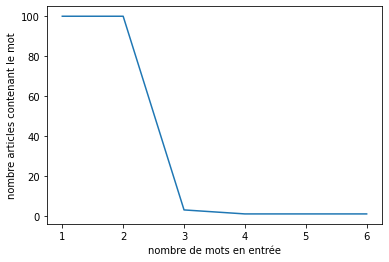

In [78]:
names = list(data.keys())
values_words = list(data["entryWordSize"])
values_articles = list(data["givenPuliedArticleSize"])
values_size_corpus = list(data["givenCorpusSize"])
print(values_words, values_articles)
plt.ylabel('nombre articles contenant le mot')
plt.xlabel('nombre de mots en entrée')
#plt.bar(range(len(data)), values, tick_label=names)
plt.plot(values_words,values_articles)
plt.show()

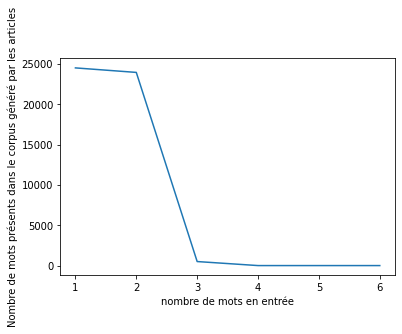

In [79]:
plt.ylabel('Nombre de mots présents dans le corpus généré par les articles')
plt.xlabel('nombre de mots en entrée')
plt.plot(values_words,values_size_corpus)
plt.show()

#**En utilisant la deuxième liste**


--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100], 'givenCorpusSize': [24509]}
--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100, 100], 'givenCorpusSize': [24509, 22658]}
--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100, 100, 100], 'givenCorpusSize': [24509, 22658, 21124]}
--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100, 100, 100, 100], 'givenCorpusSize': [24509, 22658, 21124, 24051]}
--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100, 100, 100, 100, 100], 'givenCorpusSize': [24509, 22658, 21124, 24051, 21425]}
--------- dict -------------- {'entryWordSize': [1, 1, 1, 1, 1, 1], 'givenPuliedArticleSize': [100, 100, 100, 100, 100, 100], 'givenCorpusSize': [24509, 22658, 21124, 24051, 21425, 26363]}


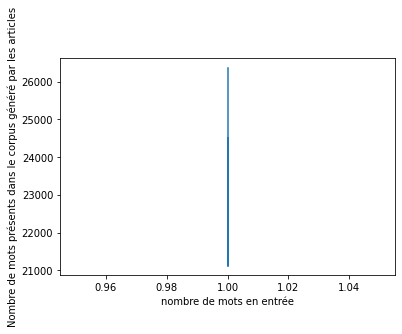

,mot(s) en entrée,nombre d articles contenant le(s) mots,taille du corpus généré
0,1,100,24509
1,covid,100,22658
2,sida,100,21124
3,tuberculosis,100,24051
4,virus,100,21425
5,patients,100,26363


In [84]:
data["entryWordSize"] = []
load_articles(keywords2)

#Graphe de variation du nombre de mots dans les article
plt.ylabel('Nombre de mots présents dans le corpus généré par les articles')
plt.xlabel('nombre de mots en entrée')
plt.plot(values_words,values_size_corpus)
plt.show()

for i in range(1, len(list(data["entryWordSize"]))):
  data["entryWordSize"][i] = keywords2[i]
import pandas as pd
df = pd.DataFrame.from_dict(data)
df.columns = ['mot(s) en entrée', 'nombre d articles contenant le(s) mots', 'taille du corpus généré']
df

In [85]:
#Recherche des documents suivant une liste de mots clés A & D
def search(query, n_articles):
	#print("-----------liste de mots ----------", query)
	results = []
	Entrez.email = 'biljolefa@gmail.com'
	for q in query:
		handle = Entrez.esearch(db='pubmed', sort='relevance', retmax=str(n_articles), retmode='xml', term=q)
		results.append(Entrez.read(handle))
		time.sleep(2)
	return results


# Charger le résultat de la recherche, les articles trouvés suivant le mot clé
def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'biljolefa@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results


# Recherche et chargement des articles trouvés sur pubmed
def load_articles(keyword='fever', n_articles = 100, name="default"):

	#Plot corpus size evolution peer number on keywords

	results = search(keyword, n_articles) # fever
	#print("--------- result dans load --------------", results)
	#id_list = results['IdList']
	#results = search(keyword, n_articles) # fever
	id_list = []
	for re in results:
		#print("-------------------------------------re--------------------------------", re)
		id_list.append(str(re['IdList']).strip('[]'))
	#print("----------------- id list --------------------", id_list)
	papers = fetch_details(id_list)
	articles = dict()
	for article in papers['PubmedArticle']:
		#print("-----clefs--------", article['MedlineCitation']['Article'].keys())
		#articles[paper['MedlineCitation']['Article']['ArticleTitle']] = ','.join(paper['MedlineCitation']['Article']['Abstract']['AbstractText'])
		if 'Abstract' in article['MedlineCitation']['Article'].keys():
			articles[article['MedlineCitation']['Article']['ArticleTitle']] = ','.join(article['MedlineCitation']['Article']['Abstract']['AbstractText'])
	#print(articles)
	df = pd.DataFrame(articles, index=[0])
	df
	corpus = df.copy().iloc[0,:]
	text = corpus
	f = open(name+".txt", "a+")
	#on découpe chaque ligne en taille de 50 mots max avant d'écrire dans le fichier
	for line in text:
		tmp = str(line).split(" ")
		cpt = 0
		#print("----", tmp)
		f.write(str(' '.join(tmp[cpt:cpt+45])).strip('[]')) #on écrit juste 50 mots max par ligne
		f.write('\n\n')
		cpt = cpt+45
	f.close()
	return df

In [86]:
load_articles(keywords1,100, "Corpus_keyword1")

,Study on perinatal-related factors of maternity and newborn in parturients with intrapartum fever in part of Eastern China: A cross-sectional study.,Efficacy of Scenario Simulation-Based Education in Relieving Parental Anxiety about Fever in Children.,Fever and hypothermia represent two populations of sepsis patients and are associated with outside temperature.,Reasons for canakinumab initiation among patients with periodic fever syndromes: a retrospective medical chart review from the United States.,Description and Analysis of a Novel Subtype of the Anti-Synthetase Syndrome Characterized by Frequent Attacks of Fever and Systemic Inflammation in a Single-Center Cohort Study.,Drug fever induced by carboplatin-based regimens: Higher incidence in a women's hospital.,Behavioural Fever Promotes an Inflammatory Reflex Circuit in Ectotherms.,Comparison of intravenous ibuprofen and paracetamol in the treatment of fever: A randomized double-blind study.,Severe Dysphagia Predicts Poststroke Fever.,Nomogram for perinatal prediction of intrapartum fever: a retrospective case-control study.,...,Breathing through a troubled life - a phenomenological-hermeneutic study of chronic obstructive pulmonary disease patients' lived experiences during the course of pulmonary rehabilitation.,The difference in knowledge and concerns between healthcare professionals and patients about genetic-related issues: A questionnaire-based study.,Barriers to Effective Pain Management in Cancer Patients From the Perspective of Patients and Family Caregivers: A Qualitative Study.,How and why patients made Long Covid.,"The effect of psychological factors on pain, function and quality of life in patients with rotator cuff tendinopathy: A systematic review.",Trajectory of self-care behaviour in patients with heart failure: the impact on clinical outcomes and influencing factors.,Experiences of suffering among elderly hip-fracture patients during the preoperative period: patients' and nurse's perspective.,Aligning care with the personal values of patients with complex care needs.,COVID-19 pandemic: Impact on the management of patients with hepatocellular carcinoma at a tertiary care hospital.,Caregiver Burden as a Mediator Between Emotional Distress and Concentration Problems in Patients With Cancer.
0,Maternal intrapartum fever has a serious impac...,This study was designed to evaluate the short-...,Fever and hypothermia have been observed in se...,Although canakinumab has demonstrated efficacy...,The aim of this study was to investigate anti-...,Previous studies have reported low incidence o...,The communication between the brain and the im...,Fever is one of the frequent reasons for admis...,Fever is a common observation after ischemic o...,To explore the risk factors for intrapartum fe...,...,<b>Purpose</b>: Exploring real-life experience...,Effective adoption of genetics in clinical pra...,Pain is one of the most common and undesired s...,Patients collectively made Long Covid - and co...,Psychological factors may affect the pain leve...,Patients' self-care behaviour is still subopti...,"In Norway, 6000 patients were operated on due ...",To identify opportunities to align care with t...,Patients with hepatocellular carcinoma (HCC) r...,To examine the longitudinal mediation effect o...


In [87]:
load_articles(keywords2,100, "Corpus_keyword2")

,Study on perinatal-related factors of maternity and newborn in parturients with intrapartum fever in part of Eastern China: A cross-sectional study.,Efficacy of Scenario Simulation-Based Education in Relieving Parental Anxiety about Fever in Children.,Fever and hypothermia represent two populations of sepsis patients and are associated with outside temperature.,Reasons for canakinumab initiation among patients with periodic fever syndromes: a retrospective medical chart review from the United States.,Description and Analysis of a Novel Subtype of the Anti-Synthetase Syndrome Characterized by Frequent Attacks of Fever and Systemic Inflammation in a Single-Center Cohort Study.,Drug fever induced by carboplatin-based regimens: Higher incidence in a women's hospital.,Behavioural Fever Promotes an Inflammatory Reflex Circuit in Ectotherms.,Comparison of intravenous ibuprofen and paracetamol in the treatment of fever: A randomized double-blind study.,Severe Dysphagia Predicts Poststroke Fever.,Nomogram for perinatal prediction of intrapartum fever: a retrospective case-control study.,...,Breathing through a troubled life - a phenomenological-hermeneutic study of chronic obstructive pulmonary disease patients' lived experiences during the course of pulmonary rehabilitation.,The difference in knowledge and concerns between healthcare professionals and patients about genetic-related issues: A questionnaire-based study.,Barriers to Effective Pain Management in Cancer Patients From the Perspective of Patients and Family Caregivers: A Qualitative Study.,How and why patients made Long Covid.,"The effect of psychological factors on pain, function and quality of life in patients with rotator cuff tendinopathy: A systematic review.",Trajectory of self-care behaviour in patients with heart failure: the impact on clinical outcomes and influencing factors.,Experiences of suffering among elderly hip-fracture patients during the preoperative period: patients' and nurse's perspective.,Aligning care with the personal values of patients with complex care needs.,COVID-19 pandemic: Impact on the management of patients with hepatocellular carcinoma at a tertiary care hospital.,Caregiver Burden as a Mediator Between Emotional Distress and Concentration Problems in Patients With Cancer.
0,Maternal intrapartum fever has a serious impac...,This study was designed to evaluate the short-...,Fever and hypothermia have been observed in se...,Although canakinumab has demonstrated efficacy...,The aim of this study was to investigate anti-...,Previous studies have reported low incidence o...,The communication between the brain and the im...,Fever is one of the frequent reasons for admis...,Fever is a common observation after ischemic o...,To explore the risk factors for intrapartum fe...,...,<b>Purpose</b>: Exploring real-life experience...,Effective adoption of genetics in clinical pra...,Pain is one of the most common and undesired s...,Patients collectively made Long Covid - and co...,Psychological factors may affect the pain leve...,Patients' self-care behaviour is still subopti...,"In Norway, 6000 patients were operated on due ...",To identify opportunities to align care with t...,Patients with hepatocellular carcinoma (HCC) r...,To examine the longitudinal mediation effect o...


##**Lorsqu'on ouvre les deux fichiers générés on constate bien que le second est plus riche que le premier.**